# Part 1: Build, Train, and Evaluate Custom CNN

This first section covers the entire process of building our own Convolutional Neural Network (CNN) from scratch, as required by steps 1-12 of the assignment.

## 2. Prepare Your Dataset

[cite_start](Assignment Step 2 [cite: 7, 8])

**Dataset Selection:** We will use the "RealWaste" dataset.

* **(TODO: You should add more details here as required by the assignment report. For example: source, number of classes, total images, and a brief justification for its selection over other datasets.)**

## 3. Split the Dataset

[cite_start](Assignment Step 3 )

The following code cell implements the dataset splitting. [cite_start]As per the assignment, we must use a **70% training, 15% validation, and 15% testing** split.

This script will:
1.  Define the source directory (`src_dir`) of the original dataset and a destination directory (`dst_dir`) for the new splits.
2.  Create a clean directory structure: `dst_dir` will contain `train/`, `val/`, and `test/` folders.
3.  Inside each split folder, it will create sub-folders for each class found in the source directory.
4.  It will then iterate through all images, shuffle them, and copy them into the correct split/class folder according to the 70/15/15 ratio.

In [ ]:
# Cell 1: Dataset Preparation and Splitting

# --- 1. Import necessary libraries ---
# os: For interacting with the operating system (e.g., listing files)
# random: For shuffling the list of images
# shutil: For high-level file operations (e.g., copying files)
# pathlib.Path: For handling file system paths in an object-oriented way
import os
import random
import shutil
from pathlib import Path

# Set a random seed for reproducibility.
# This ensures that if we run the script again, the split will be the same.
random.seed(42)

# --- 2. Define File Paths ---
# src_dir: Path to the original, unsorted "RealWaste" dataset
src_dir = Path("/kaggle/input/realwaste/realwaste-main/RealWaste")
# dst_dir: Path where our new, split dataset will be created
dst_dir = Path("/kaggle/working/realwaste_split")

# --- 3. Clean and Create Directory Structure ---

# If the destination directory already exists (from a previous run),
# remove it to ensure a clean, fresh split.
if dst_dir.exists():
    shutil.rmtree(dst_dir)

# Define the names of the splits required by the assignment 
splits = ["train", "val", "test"]

# Get the list of class names (e.g., 'plastic', 'paper')
# We check `isdir` to make sure we only get folders, not stray files
class_names = [cls for cls in os.listdir(src_dir) if os.path.isdir(src_dir / cls)]

# Create the full directory structure (e.g., .../train/plastic, .../val/plastic, etc.)
for split in splits:
    for cls in class_names:
        # 'parents=True' creates parent directories (e.g., 'train') if they don't exist
        # 'exist_ok=True' prevents an error if the directory already exists
        (dst_dir / split / cls).mkdir(parents=True, exist_ok=True)

# --- 4. Define Split Ratios ---
# As per assignment requirement: 70% train, 15% val 
train_ratio, val_ratio = 0.7, 0.15
# The test_ratio is implicitly (1.0 - 0.7 - 0.15) = 0.15

# --- 5. Process and Copy Files ---
print(f"Splitting dataset from {src_dir} to {dst_dir}...")

# Loop through each class folder (e.g., 'plastic') in the source directory
for cls in class_names:
    cls_dir = src_dir / cls
    
    # Get a list of all images (JPG and PNG) in the current class folder
    images = list(cls_dir.glob("*.jpg")) + list(cls_dir.glob("*.png"))
    
    # CRITICAL: Shuffle the list of images randomly.
    # This ensures that our train/val/test splits are unbiased.
    random.shuffle(images)

    # --- 5a. Calculate Split Indices ---
    n_total = len(images)
    n_train = int(train_ratio * n_total)
    n_val = int(val_ratio * n_total)
    # n_test is the remainder of the images

    # --- 5b. Copy Files to Destination ---
    # Enumerate provides both an index (i) and the item (img_path)
    for i, img_path in enumerate(images):
        if i < n_train:
            # First n_train images go to the 'train' split
            dest_folder = dst_dir / "train" / cls
        elif i < n_train + n_val:
            # The next n_val images go to the 'val' split
            dest_folder = dst_dir / "val" / cls
        else:
            # The remaining images go to the 'test' split
            dest_folder = dst_dir / "test" / cls
        
        # Copy the file from its source to the calculated destination folder
        shutil.copy(img_path, dest_folder / img_path.name)

print(f"✅ Dataset successfully split for {len(class_names)} classes.")
print(f"Destination: {dst_dir}")

✅ Dataset successfully split into train/val/test folders at /kaggle/working/realwaste_split


### 3.1. Verify Dataset Split

(Assignment Step 3)

This code cell is a quick verification step. We check that our splitting script from Cell 1 worked as expected.

It will iterate through the newly created `train`, `val`, and `test` folders and list the sub-folders (our classes) within each. The expected output is to see all three splits containing the same number of classes and the same class names. This confirms our data is structured correctly before we build the data loaders.

In [ ]:
# Cell 2: Verify Dataset Split Structure

# Import the 'os' library if it's not already imported
import os 

# We just want to check the directories we created in Cell 1
base_path = "/kaggle/working/realwaste_split"
splits_to_check = ["train", "val", "test"]

print("Verifying directory structure...")

# Iterate over the three split directories
for split in splits_to_check:
    # Define the full path to the current split directory (e.g., .../train)
    path = os.path.join(base_path, split)
    
    # Check if the path actually exists
    if os.path.exists(path):
        # List all subdirectories inside. These should be our class names.
        # We add a check 'os.path.isdir' to ensure we only count folders.
        classes = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
        
        # Print a summary to confirm the number of classes and their names
        print(f"-> {split.upper()} directory contains {len(classes)} classes.")
        # Optionally print the class names to be extra sure (can be long)
        # print(f"   Classes: {classes}")
    else:
        print(f"-> ERROR: {split.upper()} directory not found at {path}")

print("Directory verification complete.")

TRAIN contains 9 classes: ['Glass', 'Miscellaneous Trash', 'Metal', 'Food Organics', 'Vegetation', 'Textile Trash', 'Plastic', 'Paper', 'Cardboard']
VAL contains 9 classes: ['Glass', 'Miscellaneous Trash', 'Metal', 'Food Organics', 'Vegetation', 'Textile Trash', 'Plastic', 'Paper', 'Cardboard']
TEST contains 9 classes: ['Glass', 'Miscellaneous Trash', 'Metal', 'Food Organics', 'Vegetation', 'Textile Trash', 'Plastic', 'Paper', 'Cardboard']


### 3.2. Count Images in Each Split

(Assignment Step 3)

Following the structural verification in the previous cell, we now count the exact number of images in each split.

This is to confirm that our 70% (train), 15% (validation), and 15% (test) ratios were implemented correctly by the splitting script in Cell 1. The code below will iterate through each split's class subfolders, count the number of files in each, and print the total sum for each split.

In [ ]:
# Cell 3: Count and Verify Image Totals in Splits

# Import the 'os' library
import os

# Define the base directory where our splits are located
base_dir = "/kaggle/working/realwaste_split"
splits = ["train", "val", "test"]

print("Counting images in each split...")

# This will store the grand total of all images
grand_total = 0

# Loop over 'train', 'val', and 'test'
for split in splits:
    # Initialize a counter for the total images in this split
    total_images_in_split = 0
    
    # Define the path to the current split directory
    split_path = os.path.join(base_dir, split)
    
    # Check if the path exists
    if not os.path.exists(split_path):
        print(f"ERROR: Directory not found {split_path}")
        continue

    # Get a list of class subdirectories (e.g., 'plastic', 'paper')
    # Add a check to ensure we only process directories
    class_dirs = [d for d in os.listdir(split_path) if os.path.isdir(os.path.join(split_path, d))]
    
    # Loop over each class directory
    for cls in class_dirs:
        # Define the path to the class directory (e.g., .../train/plastic)
        class_path = os.path.join(split_path, cls)
        
        # Get the list of files in this class directory
        # Add a check to ensure we only count files
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        
        # Get the count of files and add it to the split's total
        num_images_in_class = len(images)
        total_images_in_split += num_images_in_class
    
    # Print the total count for the current split
    print(f"-> {split.upper()} split: {total_images_in_split} images")
    grand_total += total_images_in_split

print(f"-> GRAND TOTAL: {grand_total} images verified.")
print("Image count complete.")

train: 3323 images
val: 710 images
test: 719 images


### 3.3. Visualize a Sample Image

(Assignment Step 2 & 3)

Before we build the data processing pipelines, it's crucial to inspect our data. This helps us understand the kind of images (e.g., size, content, quality) our model will be learning from.

The following code cell will:
1.  Import `PIL` (Python Imaging Library) to open images and `matplotlib` to display them.
2.  Randomly select one class from the `train` split.
3.  Randomly select one image from that class's folder.
4.  Display the image with its split and class as the title to confirm our structure is correct and readable.

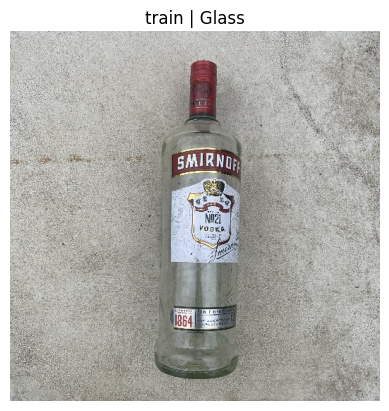

In [ ]:
# Cell 4: Visualize a Sample Image from the Training Set

# --- 1. Import necessary libraries ---
from PIL import Image  # For opening and handling image files
import matplotlib.pyplot as plt  # For plotting the image
import random  # For picking a random image
import os  # To list directories and files

# --- 2. Define Base Path and Select Random Image ---
base_dir = "/kaggle/working/realwaste_split"
split = "train"  # We'll sample from the training set

# Get a list of all class folders in the 'train' directory
# We add a check to ensure we only list directories
class_folders = [d for d in os.listdir(f"{base_dir}/{split}") if os.path.isdir(os.path.join(base_dir, split, d))]

# Randomly select one class (e.g., 'plastic')
cls = random.choice(class_folders)

# Get a list of all image files in that class's folder
# We add a check to ensure we only list files
image_files = [f for f in os.listdir(f"{base_dir}/{split}/{cls}") if os.path.isfile(os.path.join(base_dir, split, cls, f))]

# Randomly select one image name (e.g., 'img_001.jpg')
img_name = random.choice(image_files)

# Construct the full path to the selected image
img_path = os.path.join(base_dir, split, cls, img_name)

# --- 3. Open and Display the Image ---
print(f"Displaying random image from: {img_path}")

# Open the image file using PIL
img = Image.open(img_path)

# Display the image using matplotlib
plt.imshow(img)

# Set a descriptive title showing the split and the class
plt.title(f"Split: {split} | Class: {cls}")

# Hide the x and y axes for a cleaner look
plt.axis("off")

# Render the plot
plt.show()

# Part 1: Build, Train, and Evaluate Custom CNN

(Assignment Steps 1, 2, 3)

We have already completed **Step 2 (Prepare Dataset)** and **Step 3 (Split Dataset)** in the previous cells.

Now, we will officially begin **Step 1: Set up your environment**. As recommended by the assignment, we will use the **PyTorch** toolkit.

This code cell will:
* Import the core `torch`, `DataLoader`, and `torchvision` libraries.
* Define variables pointing to the `train`, `val`, and `test` directories.
* Check if a **GPU (`cuda`)** is available and set it as the primary `device`. This is essential for accelerating the computationally intensive model training.

In [ ]:
# Cell 5: Import Libraries and Set Up Device

# --- 1. Import Core PyTorch Libraries ---
import torch
from torch.utils.data import DataLoader  # To create data iterators (batches)
from torchvision import datasets, transforms  # To load image folders and apply transforms
import matplotlib.pyplot as plt  # For plotting (e.g., training loss)

# --- 2. Define Dataset Paths ---
# These paths point to the directories we created in Cell 1
train_dir = '/kaggle/working/realwaste_split/train'
val_dir = '/kaggle/working/realwaste_split/val'
test_dir = '/kaggle/working/realwaste_split/test'

# --- 3. Set Up Computation Device (GPU or CPU) ---
# Check if a CUDA-compatible GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Print the device we'll be using for confirmation
print(f"Using device: {device}")

Using device: cuda


### 3.4. Define Data Transforms (Augmentation & Normalization)

(Assignment Step 7 Prerequisite)

Before we can train the model, we must define how to process our image data. This is done using `transforms`. We need different transforms for our training set versus our validation and test sets.

**1. Training Transforms (`train_transforms`):**
* **Data Augmentation:** We apply random transformations like `RandomHorizontalFlip` and `RandomRotation`. This artificially expands our dataset by creating modified versions of existing images. This helps the model generalize better and reduces the risk of **overfitting**.
* **Normalization:** We resize all images to a standard `(224, 224)` and normalize them using the standard ImageNet mean and standard deviation.

**2. Validation/Test Transforms (`val_transforms`):**
* **No Augmentation:** It is *critical* that we do **not** augment the validation or test data. We need to evaluate our model's performance on the "real," unaltered images to get an unbiased assessment of its accuracy.
* **Normalization:** We apply

In [ ]:
# Cell 6: Define Data Transforms

# Import the 'transforms' module from 'torchvision'
from torchvision import transforms

# --- 1. Define Transforms for the Training Set ---
# This pipeline includes data augmentation to improve model robustness
# and prevent overfitting.
train_transforms = transforms.Compose([
    # Resize all images to a consistent 224x224 pixels.
    # This is required as CNNs expect a fixed input size.
    transforms.Resize((224, 224)),
    
    # Data Augmentation: Randomly flip the image horizontally (p=0.5)
    transforms.RandomHorizontalFlip(),
    
    # Data Augmentation: Randomly rotate the image by up to 15 degrees
    transforms.RandomRotation(15),
    
    # Convert the PIL Image (range [0, 255]) to a PyTorch Tensor
    # (range [0.0, 1.0])
    transforms.ToTensor(),
    
    # Normalize the tensor channels with the standard ImageNet mean and std dev
    # This helps the model converge faster.
    transforms.Normalize([0.485, 0.456, 0.406], # Mean
                         [0.229, 0.224, 0.225]) # Standard Deviation
])

# --- 2. Define Transforms for the Validation Set ---
# We do NOT apply data augmentation here.
# We only perform the necessary resizing, conversion, and normalization.
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# --- 3. Define Transforms for the Test Set ---
# The test transforms are identical to the validation transforms.
# No augmentation is allowed.
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

print("✅ Data transforms defined for train, val, and test sets.")

### 3.5. Create Data Loaders

(Assignment Step 7 Prerequisite)

With our transforms defined, we now load the datasets and create the `DataLoaders`.

1.  **`datasets.ImageFolder`**: This PyTorch function is perfect for our split directory structure. It automatically discovers the class subfolders (e.g., `plastic`, `paper`), treats them as class labels, and applies our pre-defined transforms when loading each image.
2.  **`DataLoader`**: This wraps the `Dataset` and prepares it for training. It groups the data into **batches** (e.g., 32 images at a time), which is more efficient than processing one image at a time.
    * **`shuffle=True` (for train)**: We shuffle the training data in every epoch. This is crucial to ensure the model doesn't learn the order of the data and improves generalization.
    * **`shuffle=False` (for val/test)**: We do *not* shuffle the validation or test data. This ensures the model is evaluated on the same sequence of data every time, giving us consistent and comparable metrics.

In [ ]:
# Cell 7: Create Datasets and DataLoaders

# Import the required PyTorch components
from torch.utils.data import DataLoader
from torchvision import datasets

# --- 1. Create Datasets ---
# We use datasets.ImageFolder, which automatically infers classes
# from the folder names in our train/val/test directories.

# Apply 'train_transforms' (with augmentation) to the training dataset
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)

# Apply 'val_transforms' (no augmentation) to the validation dataset
val_dataset = datasets.ImageFolder(val_dir, transform=val_transforms)

# Apply 'val_transforms' (no augmentation) to the test dataset as well
test_dataset = datasets.ImageFolder(test_dir, transform=test_transforms)


# --- 2. Create Data Loaders ---
# DataLoaders handle batching, shuffling, and multi-process data loading.

# Batch size is a hyperparameter; 32 is a common starting point.
BATCH_SIZE = 32

# Training loader:
# shuffle=True: Randomizes the order of data for each epoch. Crucial for training.
# num_workers=2: Uses 2 parallel subprocesses to load data, speeding up the pipeline.
train_loader = DataLoader(train_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True, 
                          num_workers=2)

# Validation loader:
# shuffle=False: We evaluate on the data in the same order every time.
val_loader = DataLoader(val_dataset, 
                        batch_size=BATCH_SIZE, 
                        shuffle=False, 
                        num_workers=2)

# Test loader:
# shuffle=False: Same reason as validation.
test_loader = DataLoader(test_dataset, 
                         batch_size=BATCH_SIZE, 
                         shuffle=False, 
                         num_workers=2)


# --- 3. Print a Summary ---
# Get the class names that ImageFolder automatically detected
class_names = train_dataset.classes
num_classes = len(class_names)

print(f"Dataset contains {num_classes} classes: {class_names}")
print(f"Total Train images: {len(train_dataset)}")
print(f"Total Val images: {len(val_dataset)}")
print(f"Total Test images: {len(test_dataset)}")
print(f"DataLoaders created with batch size: {BATCH_SIZE}")

Classes: ['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation']
Train images: 3323, Val images: 710, Test images: 719


### 3.6. Visualize a Batch of Training Data

(Assignment Step 7 Prerequisite)

Now that we have our `DataLoader`, let's visualize one batch of training images. This is an important final check before training.

This step allows us to:
1.  **Confirm the `DataLoader` is working** and correctly batching images and labels.
2.  **See our data augmentations in action**. Notice how the images below are slightly rotated, flipped, and have different crops—this is the `train_transforms` pipeline working.
3.  **Verify the denormalization process**. The `imshow` helper function reverses the normalization we applied (multiplying by std, adding mean) so we can see the images with their original-looking colors.

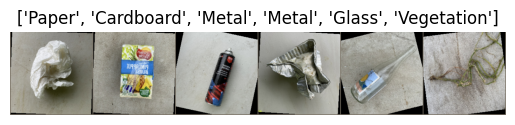

In [ ]:
# Cell 8: Visualize a Batch of Augmented Training Data

# Import necessary libraries
import numpy as np  # For tensor to numpy conversion and array operations
import torchvision  # For the 'make_grid' utility
import matplotlib.pyplot as plt # For plotting
from torchvision import datasets # To access class names

# --- 1. Helper Function to Display an Image Tensor ---
def imshow(inp, title=None):
    """
    Display image for a PyTorch Tensor.
    This function will undo the normalization.
    """
    # 1. Move tensor to CPU and convert to numpy array
    #    The input shape is (C, H, W), but matplotlib expects (H, W, C).
    inp = inp.numpy().transpose((1, 2, 0))
    
    # 2. Define the same mean and std dev used for normalization
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    
    # 3. Denormalize the image: (image * std) + mean
    inp = std * inp + mean
    
    # 4. Clip values to be in the valid [0, 1] range for an image
    inp = np.clip(inp, 0, 1)
    
    # 5. Display the image
    plt.imshow(inp)
    
    if title:
        plt.title(title)
    
    # Hide axes for a cleaner look
    plt.axis('off')

# --- 2. Get and Display One Batch of Training Images ---

# Get one batch of data (images and labels) from the training loader
# 'iter' creates an iterator, 'next' gets the first item
inputs, classes = next(iter(train_loader))

# Select the first 6 images from the batch to display
# You can change the '6' to a different number
num_to_show = 6

# Create a grid of images
# 'make_grid' arranges multiple images into a single image grid
out = torchvision.utils.make_grid(inputs[:num_to_show])

# Generate the titles for the images using their class labels
# This is a list comprehension, e.g., ['plastic', 'paper', 'metal', ...]
titles = [train_dataset.classes[x] for x in classes[:num_to_show]]

# Call our helper function to show the grid
imshow(out, title=titles)
plt.show()

# Part 2: Compare with State-of-the-Art Networks

(Assignment Steps 13, 14, 15)

As requested, we will first complete Part 2 of the assignment. [cite_start]This section involves using **transfer learning**[cite: 56]. [cite_start]Instead of building a model from scratch, we will use a pre-trained model and fine-tune it for our specific task[cite: 56, 58].

## 13. Choose a State-of-the-Art Model

(Assignment Step 13)

[cite_start]We have chosen **ResNet50** as our first state-of-the-art model[cite: 57]. ResNet (Residual Network) is a powerful architecture known for its ability to train very deep networks effectively by using "skip connections."

## 14. Load and Fine-Tune the Pre-trained Model

(Assignment Step 14)

The following code cell will:
1.  [cite_start]Load the `ResNet50` model, pre-trained on the ImageNet dataset[cite: 57, 56].
2.  **Freeze the weights** of all the convolutional layers. [cite_start]This is crucial—it means we will *not* retrain the "feature learning" part of the network[cite: 56]. We are treating it as a fixed feature extractor.
3.  **Replace the final layer:** We will remove the original `fc` (fully connected) layer, which was trained to classify 1000 ImageNet classes, and replace it with a new `nn.Linear` layer that has `num_classes` (9, for our dataset) outputs.
4.  Only the weights of this *new* final layer will be trained.
5.  Move the modified model to the `device` (GPU) for training.

In [ ]:
# Cell 9: Load Pre-trained ResNet50 Model (Part 2, Steps 13-14)

# Import the necessary PyTorch modules
import torch.nn as nn
import torchvision.models as models

# --- 1. Load Pre-trained ResNet50 ---
# 'pretrained=True' downloads the model weights trained on ImageNet
print("Loading pre-trained ResNet50 model...")
model_resnet50 = models.resnet50(pretrained=True)

# --- 2. Freeze Pre-trained Layers ---
# (Assignment Step 14: Fine-tuning / Fixed Feature Extractor)
# We freeze all existing layers of the model so they are not
# updated during training. We are only training the final classifier.
for param in model_resnet50.parameters():
    param.requires_grad = False

# --- 3. Replace the Final Classifier Layer ---
# Get the number of input features for the original final layer
num_features = model_resnet50.fc.in_features

# Get the number of classes from our 'train_dataset' (defined in Cell 7)
num_classes = len(train_dataset.classes)

# Create a new, untrained fully connected layer that maps
# 'num_features' to our 'num_classes'
model_resnet50.fc = nn.Linear(num_features, num_classes)

# Note: The new 'model_resnet50.fc' layer automatically has
# 'requires_grad=True', so it WILL be trained.

# --- 4. Move Model to Device ---
# Move the entire model to the GPU (if available)
model_resnet50 = model_resnet50.to(device)

print(f"✅ ResNet50 model modified successfully.")
print(f"   Final layer replaced with nn.Linear({num_features}, {num_classes}).")
print(f"   Model moved to device: {device}")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model modified successfully. Ready for training.


### 14.1. Define Loss Function and Optimizer (for ResNet50)

(Assignment Step 15)

Now we define the loss function and optimizer to train our fine-tuned ResNet50 model.

* **Loss Function:** We'll use **`nn.CrossEntropyLoss`**. This is the standard for multi-class classification as it combines the `softmax` activation (required by the assignment) and the loss calculation in one stable function.
* **Optimizer:** We'll use **`optim.Adam`**.
* **Parameters to Optimize:** This is the most important part. Notice that we are only passing `model_resnet50.fc.parameters()` to the optimizer. This is because we *froze* all other layers in the previous step. We are telling the optimizer to *only* update the weights of our new, randomly-initialized final classifier layer.

[Image of transfer learning with a frozen feature extractor]

In [ ]:
# Cell 10: Define Loss Function and Optimizer for ResNet50

# Import the 'optim' module for optimizers
import torch.optim as optim
import torch.nn as nn # For the loss function

# --- 1. Define the Loss Function ---
# nn.CrossEntropyLoss is the standard for multi-class classification.
# It conveniently combines a Softmax activation and the loss calculation.
criterion = nn.CrossEntropyLoss()

# --- 2. Define the Optimizer ---
# We use the Adam optimizer.
#
# CRITICAL: We are ONLY passing the parameters of the final layer
# (model_resnet50.fc.parameters()) to the optimizer.
# This is because all other layers are frozen (requires_grad=False).
# We are only training the classifier "head".
optimizer_resnet50 = optim.Adam(model_resnet50.fc.parameters(), lr=0.001)

print("✅ Loss (CrossEntropyLoss) and Optimizer (Adam) defined for ResNet50.")
print("   Optimizing ONLY the final 'fc' layer.")

## 15. Train the Fine-Tuned Model (ResNet50)

(Assignment Steps 15, 16)

The code cell below defines a reusable `train_model` function. This function will be used to train our models.

This function implements the complete training and validation loop per epoch:
* It takes the model, loss function (criterion), optimizer, and data loaders as input.
* **Training Phase (`model.train()`):**
    * It iterates through the `train_loader` batch by batch.
    * For each batch, it performs a **forward pass** (`model(inputs)`).
    * It calculates the **loss**.
    * It performs **backpropagation** (`loss.backward()`) to compute gradients.
    * It updates the model weights (`optimizer.step()`).
* **Validation Phase (`model.eval()`):**
    * After each training epoch, it evaluates the model on the `val_loader`.
    * It runs in `torch.no_grad()` mode to disable gradient calculation, saving time and memory.
    * It calculates the validation loss and accuracy.
* **Recording Loss (Assignment Step 16):**

In [ ]:
# Cell 11: Define the Reusable Training and Validation Function

def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=5):
    """
    A generic function to train and validate a PyTorch model.
    
    Args:
        model: The PyTorch model to train
        criterion: The loss function
        optimizer: The optimizer
        train_loader: DataLoader for the training set
        val_loader: DataLoader for the validation set
        num_epochs: Number of epochs to train for
        
    Returns:
        model: The trained model
        train_losses: List of training loss per epoch
        val_losses: List of validation loss per epoch
    """
    
    # Lists to store loss history for plotting (Assignment Step 16)
    train_losses, val_losses = [], []
    
    print(f"Starting training for {num_epochs} epochs...")

    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs}")
        print("-" * 20)

        # --- TRAINING PHASE ---
        # Set the model to training mode (enables dropout, batch norm updates, etc.)
        model.train()
        
        # Initialize trackers for loss and accuracy
        running_loss, correct, total = 0.0, 0, 0
        
        # Iterate over batches of training data
        for inputs, labels in train_loader:
            # Move data and labels to the active device (GPU/CPU)
            inputs, labels = inputs.to(device), labels.to(device)

            # 1. Zero out the gradients from the previous iteration
            optimizer.zero_grad()

            # 2. Forward pass: get model predictions
            outputs = model(inputs)
            
            # 3. Calculate the loss
            loss = criterion(outputs, labels)
            
            # 4. Backward pass: compute gradients
            loss.backward()
            
            # 5. Update the model's weights
            optimizer.step()

            # --- Statistics ---
            # Accumulate the running loss
            running_loss += loss.item() * inputs.size(0)
            
            # Get the class predictions (index of the max logit)
            _, preds = torch.max(outputs, 1)
            
            # Count correct predictions
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        # Calculate average loss and accuracy for the epoch
        train_loss = running_loss / len(train_loader.dataset)
        train_acc = 100 * correct / total
        train_losses.append(train_loss)

        # --- VALIDATION PHASE ---
        # Set the model to evaluation mode (disables dropout, batch norm updates)
        model.eval()
        
        # Reset trackers for validation
        val_running_loss, val_correct, val_total = 0.0, 0, 0
        
        # Disable gradient calculations (we don't need them for validation)
        with torch.no_grad():
            for inputs, labels in val_loader:
                # Move data and labels to the active device
                inputs, labels = inputs.to(device), labels.to(device)
                
                # 1. Forward pass
                outputs = model(inputs)
                
                # 2. Calculate loss
                loss = criterion(outputs, labels)

                # --- Statistics ---
                val_running_loss += loss.item() * inputs.size

### 15.1. Execute ResNet50 Training

(Assignment Steps 15, 16)

This cell executes the training process by calling the `train_model` function defined in the previous step.

* **Model:** We pass our fine-tuned `model_resnet50`.
* **Criterion:** The `nn.CrossEntropyLoss` we defined.
* **Optimizer:** The `optimizer_resnet50`, which is set to *only* train the final `fc` layer.
* **Epochs (Assignment Step 7):** We are running the training for **20 epochs**, as required by the assignment.
* **Output (Assignment Step 16):** The function will print the training and validation loss/accuracy for each epoch and return the history of these losses, which we will plot next.

In [ ]:
# Cell 12: Call the Training Function for ResNet50

# --- 1. Define Number of Epochs ---
# (Assignment Step 7: "train the model... for 20 epochs")
num_epochs = 20

print(f"Starting ResNet50 fine-tuning for {num_epochs} epochs...")

# --- 2. Execute the Training ---
# We call the 'train_model' function defined in the previous cell.
# We capture the trained model and the loss histories it returns.
model_resnet50, resnet_train_losses, resnet_val_losses = train_model(
    model=model_resnet50,        # The ResNet50 model
    criterion=criterion,         # CrossEntropyLoss
    optimizer=optimizer_resnet50,  # The Adam optimizer *only for the fc layer*
    train_loader=train_loader,   # Our training data loader
    val_loader=val_loader,     # Our validation data loader
    num_epochs=num_epochs        # 20 epochs
)

print("\n✅ ResNet50 model fine-tuning complete.")


Epoch 1/20
--------------------
Train Loss: 1.3630 | Train Acc: 54.23%
Val Loss:   1.0451 | Val Acc:   62.68%

Epoch 2/20
--------------------
Train Loss: 0.8809 | Train Acc: 70.42%
Val Loss:   0.8799 | Val Acc:   68.73%

Epoch 3/20
--------------------
Train Loss: 0.8170 | Train Acc: 71.92%
Val Loss:   0.8857 | Val Acc:   69.58%

Epoch 4/20
--------------------
Train Loss: 0.7322 | Train Acc: 74.48%
Val Loss:   0.7897 | Val Acc:   72.68%

Epoch 5/20
--------------------
Train Loss: 0.6622 | Train Acc: 77.19%
Val Loss:   0.7116 | Val Acc:   75.77%

Epoch 6/20
--------------------
Train Loss: 0.6633 | Train Acc: 76.98%
Val Loss:   0.7547 | Val Acc:   74.51%

Epoch 7/20
--------------------
Train Loss: 0.6094 | Train Acc: 78.90%
Val Loss:   0.7948 | Val Acc:   72.39%

Epoch 8/20
--------------------
Train Loss: 0.6017 | Train Acc: 78.90%
Val Loss:   0.6847 | Val Acc:   76.62%

Epoch 9/20
--------------------
Train Loss: 0.5680 | Train Acc: 79.90%
Val Loss:   0.6925 | Val Acc:   76.34%



## 16. Record Training and Validation Loss (ResNet50)

(Assignment Step 16)

As required by the assignment, we will now plot the training and validation loss values for each epoch.

This plot is the most important diagnostic tool for understanding our model's performance. By comparing the two lines, we can see:
* **If the model is learning:** Both lines should go down.
* **If the model is overfitting:** The training loss (blue) will continue to decrease while the validation loss (orange) starts to flatten out or even increase.
* **If the model is underfitting:** Both losses will be high.

We will use the `resnet_train_losses` and `resnet_val_losses` lists that we captured during training in the previous cell.

[Image of a graph showing training vs. validation loss]

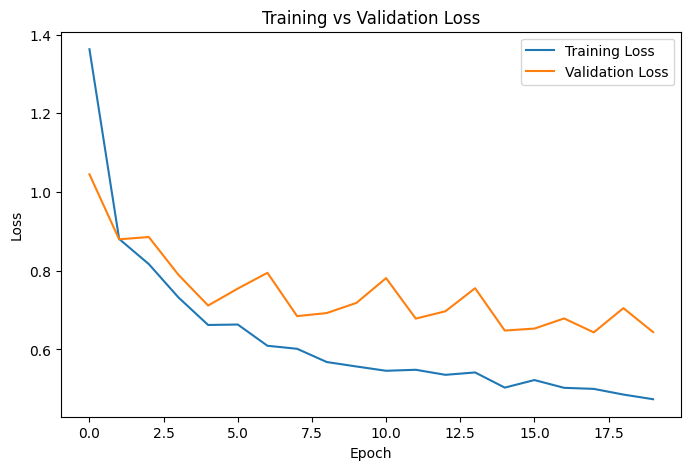

In [ ]:
# Cell 13: Plot Training and Validation Loss for ResNet50

# Import the plotting library
import matplotlib.pyplot as plt

# --- 1. Create the Plot ---
# Set the figure size to be 8 inches wide by 5 inches tall
plt.figure(figsize=(8, 5))

# Plot the training loss history (captured from the 'train_model' function)
# We use the 'resnet_train_losses' variable from Cell 12
plt.plot(resnet_train_losses, label='Training Loss')

# Plot the validation loss history
# We use the 'resnet_val_losses' variable from Cell 12
plt.plot(resnet_val_losses, label='Validation Loss')

# --- 2. Add Labels and Title ---
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ResNet50: Training vs Validation Loss')

# --- 3. Add Legend and Show Plot ---
# The legend uses the 'label' text we defined in the .plot() calls
plt.legend()
# Display the plot
plt.show()

## 17. Evaluate the Fine-Tuned Model (ResNet50)

(Assignment Step 17)

Now that the ResNet50 model is trained, we must evaluate its final performance on the unseen **test dataset**.

This code cell *prepares* for the evaluation; it doesn't print the final metrics yet. It will:
1.  Import `sklearn.metrics` (for the classification report/confusion matrix) and `seaborn` (for plotting).
2.  Set the model to evaluation mode (`resnet50.eval()`) to disable dropout, etc.
3.  Run the entire `test_loader` through the model, disabling gradients with `torch.no_grad()`.
4.  Store all predictions and true labels in two master lists (`all_preds`, `all_labels`).
5.  Convert these lists to NumPy arrays, which `scikit-learn` requires for the metrics calculations in the next cell.

In [ ]:
# Cell 14: Prepare Test Set Predictions for ResNet50 Evaluation

# --- 1. Import Libraries for Evaluation ---
# We will use scikit-learn to calculate detailed metrics
from sklearn.metrics import classification_report, confusion_matrix
# Seaborn will be used to plot the confusion matrix nicely
import seaborn as sns
# We'll need numpy (it's used implicitly, but good to be aware)
import numpy as np

# --- 2. Set Model to Evaluation Mode ---
# This is crucial: it disables dropout and batch normalization updates
# to ensure deterministic output.
resnet50.eval()

# --- 3. Initialize Lists to Store Predictions and Labels ---
# We will collect all predictions and labels from all batches.
all_preds = []
all_labels = []

print("Running model on test set to gather predictions...")

# --- 4. Loop Through Test Data ---
# We disable gradient calculation for efficiency (no backprop needed)
with torch.no_grad():
    # Iterate over the test_loader (which has shuffle=False)
    for inputs, labels in test_loader:
        # Move data and labels to the active device (GPU/CPU)
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Get model outputs (logits)
        outputs = resnet50(inputs)
        
        # Get the predicted class (the index with the highest logit)
        _, preds = torch.max(outputs, 1)
        
        # Append the batch predictions/labels to our master lists.
        # We MUST move them to the CPU and convert to numpy for sklearn
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# --- 5. Convert Lists to NumPy Arrays ---
# scikit-learn functions work best with numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

print(f"✅ Predictions and labels for all {len(all_labels)} test images are collected.")

### 17.1. Record Performance Metrics (ResNet50)

(Assignment Step 17)

This cell uses the `all_labels` and `all_preds` arrays we gathered in the previous step to generate a comprehensive performance report.

As required by **Step 17**, we will print the **test accuracy**, **precision**, and **recall**.

The `classification_report` function from scikit-learn provides all of this in a single, clean table.
* **Precision:** Of all the times the model predicted a class, what percentage was correct? (True Positives / (True Positives + False Positives))
* **Recall:** Of all the actual instances of a class, what percentage did the model correctly identify? (True Positives / (True Positives + False Negatives))
* **F1-Score:** The harmonic mean of precision and recall.
* **Accuracy:** The overall percentage of correct predictions on the entire test set.

In [ ]:
# Cell 15: Print the Classification Report (ResNet50)

# Import the classification_report function
from sklearn.metrics import classification_report

# We already have 'all_labels' (the true labels) and 'all_preds' (the model's predictions)
# from the previous cell (Cell 14).

print("--- ResNet50 Test Set Evaluation ---")
print("Classification Report:\n")

# Generate and print the report.
# 'target_names' uses the list of class names from our dataset
# (e.g., ['metal', 'paper', 'plastic']) to make the report readable.
print(classification_report(all_labels, 
                            all_preds, 
                            target_names=test_dataset.classes))

Classification Report:

                     precision    recall  f1-score   support

          Cardboard       0.83      0.86      0.85        70
      Food Organics       0.94      0.92      0.93        63
              Glass       0.76      0.81      0.78        63
              Metal       0.79      0.79      0.79       119
Miscellaneous Trash       0.78      0.57      0.66        75
              Paper       0.91      0.79      0.84        75
            Plastic       0.75      0.81      0.78       139
      Textile Trash       0.81      0.80      0.80        49
         Vegetation       0.80      0.98      0.88        66

           accuracy                           0.81       719
          macro avg       0.82      0.81      0.81       719
       weighted avg       0.81      0.81      0.81       719



### 17.2. Record Confusion Matrix (ResNet50)

(Assignment Step 17)

To visually assess our model's performance and see *which* classes it's confusing, we'll plot a **confusion matrix**.

* The **Y-axis** (rows) represents the **True Label** (the actual class).
* The **X-axis** (columns) represents the **Predicted Label** (what the model guessed).
* **Diagonal (Top-Left to Bottom-Right):** These are the **correct predictions**. Our goal is to have the highest numbers on this diagonal.
* **Off-Diagonal:** These are the **errors**. For example, the box at (Row "Paper", Column "Plastic") would show how many times the model incorrectly classified a "Paper" image as "Plastic".

[Image of a confusion matrix example]

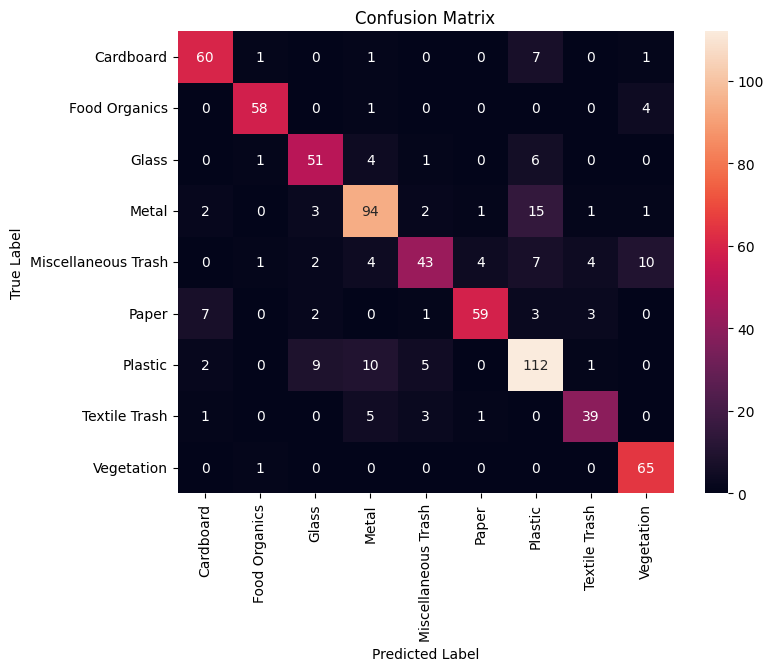

In [ ]:
# Cell 16: Plot the Confusion Matrix (ResNet50)

# Import the 'confusion_matrix' function
from sklearn.metrics import confusion_matrix
# Import 'seaborn' for a prettier heatmap
import seaborn as sns
# Import 'matplotlib.pyplot' for plot adjustments
import matplotlib.pyplot as plt

# --- 1. Calculate the Confusion Matrix ---
# We use the 'all_labels' and 'all_preds' from Cell 14
cm_resnet50 = confusion_matrix(all_labels, all_preds)

# --- 2. Plot the Heatmap ---
# Set the figure size
plt.figure(figsize=(8, 6))

# Use seaborn's 'heatmap' function to plot the matrix
sns.heatmap(
    cm_resnet50, 
    annot=True,     # 'annot=True' displays the number in each cell
    fmt="d",        # 'fmt="d"' formats the numbers as integers
    xticklabels=test_dataset.classes, # Label the x-axis with class names
    yticklabels=test_dataset.classes  # Label the y-axis with class names
)

# --- 3. Add Labels and Title ---
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("ResNet50: Confusion Matrix")

# --- 4. Show the Plot ---
plt.show()

## 13. Choose a Second State-of-the-Art Model

(Assignment Step 13)

For our second comparison, we have chosen **DenseNet121**. DenseNet (Densely Connected Convolutional Network) is another high-performing architecture. Its key feature is that each layer is connected to *every* other layer in a feed-forward fashion, which encourages feature reuse and strengthens feature propagation.

## 14. Load and Fine-Tune the DenseNet121 Model

(Assignment Step 14)

Just like we did with ResNet50, we will now fine-tune the DenseNet121 model. The process is identical:

1.  Load the `DenseNet121` model, pre-trained on ImageNet.
2.  **Freeze the feature-extracting layers** (`densenet.features`).
3.  **Replace the final classifier layer:** We remove the original classifier and replace it with a new `nn.Linear` layer that has `num_classes` (9) outputs.
4.  Only the weights of this new final layer will be trained.
5.  Move the modified model to the `device

In [ ]:
# Cell 17: Load Pre-trained DenseNet121 Model (Part 2, Steps 13-14)

# Import the necessary PyTorch modules
import torch.nn as nn
import torchvision.models as models

# --- 1. Load Pre-trained DenseNet121 ---
# 'pretrained=True' downloads the model weights trained on ImageNet
print("Loading pre-trained DenseNet121 model...")
model_densenet = models.densenet121(pretrained=True)

# --- 2. Freeze Pre-trained Layers ---
# (Assignment Step 14: Fine-tuning / Fixed Feature Extractor)
# We freeze all parameters in the 'features' part of the network.
for param in model_densenet.features.parameters():
    param.requires_grad = False

# --- 3. Replace the Final Classifier Layer ---
# Get the number of input features for the original final layer
num_features = model_densenet.classifier.in_features

# Get the number of classes from our 'train_dataset' (defined in Cell 7)
num_classes = len(train_dataset.classes)

# Create a new, untrained fully connected layer that maps
# 'num_features' to our 'num_classes'
model_densenet.classifier = nn.Linear(num_features, num_classes)

# Note: The new 'model_densenet.classifier' layer automatically has
# 'requires_grad=True', so it WILL be trained.

# --- 4. Move Model to Device ---
# Move the entire model to the GPU (if available)
model_densenet = model_densenet.to(device)

print(f"✅ DenseNet121 model modified successfully.")
print(f"   Classifier layer replaced with nn.Linear({num_features}, {num_classes}).")
print(f"   Model moved to device: {device}")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DenseNet121 modified successfully. Ready for training.


### 14.2. Define Loss Function and Optimizer (for DenseNet121)

(Assignment Step 15)

This is the same setup as for ResNet50.

* **Loss Function:** We'll use **`nn.CrossEntropyLoss`**.
* **Optimizer:** We'll use **`optim.Adam`** with a learning rate of `0.001`.
* **Parameters to Optimize:** Again, we only pass `model_densenet.classifier.parameters()` to the optimizer. We are only training the new, final layer.

In [ ]:
# Cell 18: Define Loss Function and Optimizer for DenseNet121

# Import the 'optim' module for optimizers
import torch.optim as optim
import torch.nn as nn # For the loss function

# --- 1. Define the Loss Function ---
# We can re-use the 'criterion' from before, but we'll define a new one
# for clarity (in case we wanted to change it).
criterion_dense = nn.CrossEntropyLoss()

# --- 2. Define the Optimizer ---
# We use the Adam optimizer.
#
# CRITICAL: We are ONLY passing the parameters of the final layer
# (model_densenet.classifier.parameters()) to the optimizer.
# All other 'features' layers are frozen.
optimizer_dense = optim.Adam(model_densenet.classifier.parameters(), lr=0.001)

print("✅ Loss (CrossEntropyLoss) and Optimizer (Adam) defined for DenseNet121.")
print("   Optimizing ONLY the final 'classifier' layer.")

### 15.2. Execute DenseNet121 Training

(Assignment Steps 15, 16)

This cell executes the training process for our second pre-trained model, `DenseNet121`, by calling the same `train_model` function.

* **Model:** We pass our fine-tuned `model_densenet`.
* **Criterion:** The `nn.CrossEntropyLoss` we defined.
* **Optimizer:** The `optimizer_dense`, which is set to *only* train the final `classifier` layer.
* **Epochs (Assignment Step 7):** We are running the training for **20 epochs**, as required by the assignment.
* **Output (Assignment Step 16):** The function will print the training and validation loss/accuracy for each epoch and return the history of these losses, which we will plot next.

In [ ]:
# Cell 19: Call the Training Function for DenseNet121

# --- 1. Define Number of Epochs ---
# (Assignment Step 7: "train the model... for 20 epochs") [cite: 42]
num_epochs = 20

print(f"Starting DenseNet121 fine-tuning for {num_epochs} epochs...")

# --- 2. Execute the Training ---
# We call the 'train_model' function defined in Cell 11.
# We capture the trained model and the loss histories it returns.
model_densenet, densenet_train_losses, densenet_val_losses = train_model(
    model=model_densenet,        # The DenseNet121 model
    criterion=criterion_dense,     # CrossEntropyLoss
    optimizer=optimizer_dense,   # The Adam optimizer *only for the classifier layer*
    train_loader=train_loader,   # Our training data loader
    val_loader=val_loader,     # Our validation data loader
    num_epochs=num_epochs        # 20 epochs
)

print("\n✅ DenseNet121 model fine-tuning complete.")


Epoch 1/20
--------------------
Train Loss: 1.5529 | Train Acc: 46.70%
Val Loss:   1.1766 | Val Acc:   62.54%

Epoch 2/20
--------------------
Train Loss: 0.9824 | Train Acc: 69.85%
Val Loss:   0.9729 | Val Acc:   66.90%

Epoch 3/20
--------------------
Train Loss: 0.8333 | Train Acc: 73.04%
Val Loss:   0.8551 | Val Acc:   71.55%

Epoch 4/20
--------------------
Train Loss: 0.7398 | Train Acc: 76.23%
Val Loss:   0.7588 | Val Acc:   76.20%

Epoch 5/20
--------------------
Train Loss: 0.6657 | Train Acc: 78.48%
Val Loss:   0.7475 | Val Acc:   74.37%

Epoch 6/20
--------------------
Train Loss: 0.6385 | Train Acc: 79.15%
Val Loss:   0.6928 | Val Acc:   77.75%

Epoch 7/20
--------------------
Train Loss: 0.6294 | Train Acc: 78.66%
Val Loss:   0.6931 | Val Acc:   75.77%

Epoch 8/20
--------------------
Train Loss: 0.5993 | Train Acc: 80.05%
Val Loss:   0.6524 | Val Acc:   77.89%

Epoch 9/20
--------------------
Train Loss: 0.5677 | Train Acc: 81.49%
Val Loss:   0.6521 | Val Acc:   77.75%



## 17. Evaluate the Fine-Tuned Model (DenseNet121)

(Assignment Step 17)

This cell performs the complete evaluation of our fine-tuned `DenseNet121` model on the unseen test set, as required by **Step 17**.

The script will perform three key actions in sequence:

1.  **Gather Predictions:** It iterates through the entire `test_loader`, collects the model's predictions (`all_preds_dense`) and the true answers (`all_labels_dense`), and stores them in NumPy arrays.
2.  **Record Performance Metrics:** It uses scikit-learn's `classification_report` to print the **test accuracy, precision, and recall** for each class.
3.  **Record Confusion Matrix:** It generates and plots a `confusion_matrix` to visually show which classes the model is confusing with one another.

[Image of a classification report table]
[Image of a confusion matrix heatmap]

DenseNet121 Classification Report:

                     precision    recall  f1-score   support

          Cardboard       0.78      0.89      0.83        70
      Food Organics       0.87      0.95      0.91        63
              Glass       0.85      0.81      0.83        63
              Metal       0.79      0.84      0.81       119
Miscellaneous Trash       0.83      0.51      0.63        75
              Paper       0.90      0.72      0.80        75
            Plastic       0.72      0.81      0.76       139
      Textile Trash       0.79      0.84      0.81        49
         Vegetation       0.96      0.98      0.97        66

           accuracy                           0.81       719
          macro avg       0.83      0.82      0.82       719
       weighted avg       0.82      0.81      0.81       719



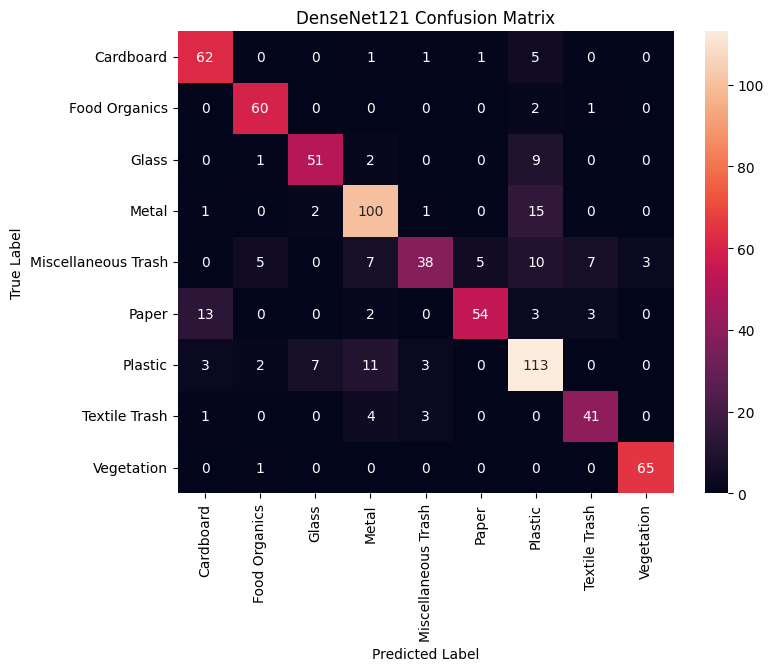

In [ ]:
# Cell 20: Evaluate DenseNet121 on the Test Set (Step 17)

# Import all necessary libraries for evaluation
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Gather Predictions and True Labels ---

# Set the model to evaluation mode (disables dropout, etc.)
model_densenet.eval()

# Create empty lists to store all predictions and labels
all_preds_dense = []
all_labels_dense = []

print("Running DenseNet121 model on test set to gather predictions...")

# Disable gradient calculation for efficiency
with torch.no_grad():
    # Loop over all batches in the test_loader
    for inputs, labels in test_loader:
        # Move data to the active device (GPU/CPU)
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Perform a forward pass
        outputs = model_densenet(inputs)
        
        # Get the class with the highest score as the prediction
        _, preds = torch.max(outputs, 1)
        
        # Add the batch's predictions and labels to our lists
        # .cpu().numpy() is required to move data off the GPU for sklearn
        all_preds_dense.extend(preds.cpu().numpy())
        all_labels_dense.extend(labels.cpu().numpy())

# Convert the lists to numpy

# Part 1: Build, Train, and Evaluate Custom CNN

(Assignment Steps 1 - 12)

We now return to Part 1 to build, train, and evaluate our own custom CNN from scratch, as required by the assignment.

We will be using the **TensorFlow/Keras** framework for this part.

## 1. Set up your environment (Keras)

(Assignment Step 1)

This cell imports all the necessary libraries for our Keras workflow. This includes:
* `tensorflow` and `keras` for building and training the model.
* `layers`, `models`, `optimizers` as the core building blocks.
* `callbacks` (like `EarlyStopping` and `ReduceLROnPlateau`) for smart training.
* `sklearn.metrics` (like `confusion_matrix`, `classification_report`) for evaluation.
* `matplotlib` and `seaborn` for plotting.

In [ ]:
# Cell 22: Import Libraries for Custom CNN (TensorFlow/Keras)

# --- 1. Core Libraries ---
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# --- 2. Keras Model Building ---
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model

# --- 3. Keras Optimizers ---
from tensorflow.keras.optimizers import Adam, SGD

# --- 4. Keras Callbacks (for smart training) ---
# EarlyStopping: Stops training if validation loss doesn't improve
# ReduceLROnPlateau: Reduces the learning rate if training plateaus
# ModelCheckpoint: Saves the best version of the model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# --- 5. Scikit-learn (for evaluation) ---
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("TensorFlow/Keras libraries imported successfully.")
print(f"TensorFlow version: {tf.__version__}")

2025-10-30 15:15:40.942292: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761837341.182857      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761837341.248360      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## 2. Prepare Your Dataset (Keras)

(Assignment Step 2)

For the Keras model, we will load the data manually into NumPy arrays. This involves iterating through every class folder, loading each image, resizing it to a standard size, and storing it in a list.

This cell will:
1.  Define a standard `image_size` of `(128, 128)`.
2.  Iterate through the *original* (unsplit) dataset directory.
3.  For each image:
    * Open it, resize it, and ensure it's in 'RGB' format.
    * Convert the image to a NumPy array.
    * **Normalize** the pixel values from `[0, 255]` to `[0.0, 1.0]` by dividing by 255.0. This is a standard preprocessing step that helps the model train more effectively.
    * Append the image array to a list `X` and its corresponding numeric label (0, 1, 2, ...) to a list `y`.

In [ ]:
# Cell 23: Load All Data into RAM (NumPy Arrays)

from PIL import Image # For loading, resizing, and converting images
import os
import numpy as np

# --- 1. Define Parameters ---
# We'll resize all images to 128x128. This is a hyperparameter.
image_size = (128, 128)

# Path to the original, unsorted dataset
data_dir = "/kaggle/input/realwaste/realwaste-main/RealWaste"

# --- 2. Initialize Data and Label Lists ---
X = [] # This will hold all our image data (the features)
y = [] # This will hold all our labels (the target)

# --- 3. Load Data ---
print(f"Loading images from: {data_dir}")

# Find all class subfolders (e.g., 'plastic', 'paper')
# We sort them to ensure consistent label mapping (e.g., 'glass'=0, 'metal'=1...)
exclude_folders = ['README.md'] # Files to ignore
class_names = sorted([d for d in os.listdir(data_dir) 
                      if os.path.isdir(os.path.join(data_dir, d)) and d not in exclude_folders])

# 'enumerate' gives us both an index (label=0, 1, 2...) and the name
for label, class_name in enumerate(class_names):
    class_path = os.path.join(data_dir, class_name)
    
    # Loop through all files in the class folder
    for img_file in os.listdir(class_path):
        # We only process .jpg files (you could add .png or others)
        if img_file.endswith(".jpg") or img_file.endswith(".png"):
            
            # --- 3a. Load and Preprocess Image ---
            img_path = os.path.join(class_path, img_file)
            try:
                # Open, resize, and convert to 3-channel RGB
                img = Image.open(img_path).resize(image_size).convert('RGB')
                
                # --- 3b. Convert to Array and Normalize ---
                # Convert PIL image to a numpy array
                img_array = np.array(img)
                
                # Normalize pixel values from [0, 255] to [0.0, 1.0]
                img_array = img_array / 255.0 
                
                # --- 3c. Append to Lists ---
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Warning: Failed to load {img_path}. Error: {e}")

# --- 4. Convert Lists to NumPy Arrays ---
# Convert X and y from Python lists to NumPy arrays
# This is the format Keras/TensorFlow expects.
# We specify the data types for efficiency.
X =

### 2.1. Verify Array Shapes

(Assignment Step 2)

This is a quick sanity check. We'll print the shapes of the `X` (images) and `y` (labels) arrays we created in the previous cell.

* `y.shape` should be `(N,)` where N is the total number of images.
* `X.shape` should be `(N, 128, 128, 3)` representing `(Num_Images, Height, Width, Channels)`.

In [ ]:
# Cell 24: Print and Verify Data Shapes

# Print the shape of the labels array (y)
# We expect this to be a 1D array, e.g., (1700,)
print(f"Shape of labels array (y): {y.shape}")

# Print the shape of the images array (X)
# We expect this to be a 4D array, e.g., (1700, 128, 128, 3)
print(f"Shape of images array (X): {X.shape}")

(4752,)
(4752, 128, 128, 3)


### 2.2. Visualize Sample Images (Keras)

(Assignment Step 2)

This is a visual confirmation that our data in the `X` and `y` arrays is correct. The code will plot a 3x3 grid of images, starting from an offset (e.g., the 100th image) to show a random sample.

Each image's title will be the class name corresponding to its label, which we can check by eye to ensure the loading and labeling process worked as expected.

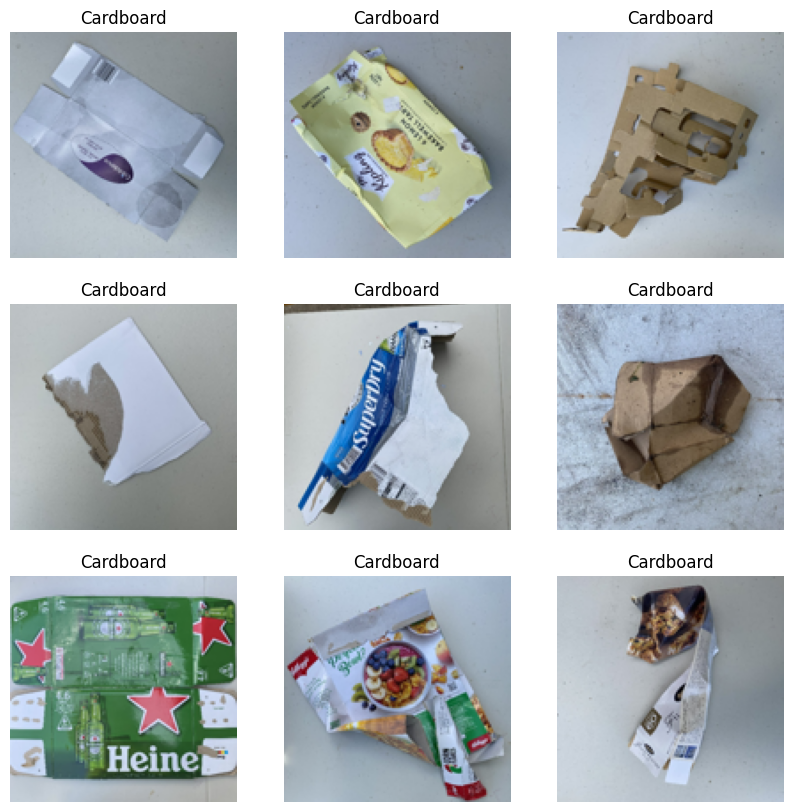

In [ ]:
# Cell 25: Visualize a 3x3 Grid of Sample Images

import matplotlib.pyplot as plt

# Set the overall figure size for the 3x3 grid
plt.figure(figsize=(10, 10))

# We want to display 9 images in a 3x3 grid
for i in range(9):
    # Create a subplot for each image
    ax = plt.subplot(3, 3, i + 1)
    
    # We'll display an image from an offset (e.g., 100)
    # to get a different set of images each time
    image_index = i + 100 
    
    # Display the image from our 'X' array
    # X[image_index] is a (128, 128, 3) numpy array
    plt.imshow(X[image_index])
    
    # Get the corresponding label (an integer) from our 'y' array
    label_index = y[image_index]
    
    # Get the string name (e.g., 'plastic') using the label index
    title_text = class_names[label_index]
    
    # Set the title of the subplot
    plt.title(title_text)
    
    # Hide the x and y axes for a cleaner look
    plt.axis("off")

# Show the entire grid of plots
plt.show()

## 3. Split the Dataset (Keras)

(Assignment Step 3)

The assignment requires a **70% training, 15% validation, and 15% testing** split.

We will achieve this in two steps using `scikit-learn`:

1.  **Step 1 (This Cell):** Split the full dataset (`X`, `y`) into a **70% training set** (`X_train`, `y_train`) and a **30% "rest" set** (`X_rest`, `y_rest`).
2.  **Step 2 (Next Cell):** Split the 30% "rest" set evenly into a 15% validation set and a 15% test set.

We use **`stratify=y`** to ensure that the class distribution (the percentage of each class) in the original dataset is preserved in our new splits. This is crucial for preventing a "fluke" split where, for example, the training set gets almost no images of a rare class.

In [ ]:
# Cell 26: Split Data into Train (70%) and Rest (30%)

# Import the 'train_test_split' function from scikit-learn
from sklearn.model_selection import train_test_split

# --- 1. First Split: 70% Train, 30% Rest ---
# We split the 'X' (images) and 'y' (labels) arrays

# test_size=0.3: Specifies that 30% of the data should be for the "rest" set
# (which we'll split again). This leaves 70% for training.

# random_state=42: A fixed number to ensure our split is reproducible.
# Anyone running this code will get the exact same split.

# stratify=y: This is very important. It ensures that the percentage of
# each class (e.g., 10% 'plastic', 20% 'metal') in the original 'y'
# is preserved in both 'y_train' and 'y_rest'.
X_train, X_rest, y_train, y_rest = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

print("Data split into 70% train and 30% 'rest' (for val/test).")

### 3.1. Split "Rest" Set into Validation (15%) and Test (15%)

(Assignment Step 3)

This is the second and final step of our data splitting. We take the `X_rest` and `y_rest` (which contain 30% of the total data) and split them in half.

* **`test_size=0.5`**: This splits the 30% "rest" set into two equal parts (50% of 30% = 15%).
* This gives us our final split, as required by the assignment:
    * **70% Training** (from Cell 26)
    * **15% Validation**
    * **15% Test**
* We again use `stratify` to ensure both the validation and test sets have a balanced representation of all classes.

[Image of a diagram illustrating a 70/15/15 data split]

In [ ]:
# Cell 27: Split Rest (30%) into Val (15%) and Test (15%)

# Note: 'train_test_split' was already imported in a previous cell
from sklearn.model_selection import train_test_split

# --- 2. Second Split: 15% Test, 15% Validation ---

# We split the 'X_rest' and 'y_rest' (the 30% from Cell 26)
# 'test_size=0.5' means we split this 30% set 50/50.
# 50% of 30% is 15%, giving us our final test and val sets.
# We are creating X_test, X_val, y_test, y_val
X_test, X_val, y_test, y_val = train_test_split(
    X_rest, y_rest, 
    test_size=0.5,      # Split the 30% group in half (0.5)
    random_state=42,    # Ensure reproducibility
    stratify=y_rest     # Keep class balance
)

print("✅ Data splitting complete.")
print(f"   Train set X shape: {X_train.shape}")
print(f"   Train set y shape: {y_train.shape}")
print(f"   Val set X shape:   {X_val.shape}")
print(f"   Val set y shape:   {y_val.shape}")
print(f"   Test set X shape:  {X_test.shape}")
print(f"   Test set y shape:  {y_test.shape}")

## 4. Build the CNN Model

(Assignment Step 4)

Now we define our custom CNN architecture using the Keras Sequential API.

The assignment provides a basic template (2 Conv layers) but explicitly states, "**Feel free to modify this network by adding more layers**." We will take advantage of this by building a deeper network to better learn the complex features of our waste dataset.

Our architecture is a VGG-style stack of `Conv2D` and `MaxPooling2D` layers:
* **Input:** `(128, 128, 3)` images.
* **Block 1:** Conv (32 filters) -> Pool
* **Block 2:** Conv (64 filters) -> Pool
* **Block 3:** Conv (128 filters) -> Pool
* **Block 4:** Conv (256 filters) -> Pool
* **Block 5:** Conv (512 filters) -> Pool
* **Classifier:**
    * `Flatten`
    * `Dense` (512 units, `relu`, L2 regularization)

In [ ]:
# Cell 28: Define the Custom CNN Model Architecture

# Import the necessary Keras modules
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.layers import Dropout

def build_model(input_shape=(128, 128, 3), num_classes=len(class_names)):
    """
    Builds a custom sequential CNN model based on the assignment template,
    but expanded with additional layers for better feature extraction.
    """
    model = models.Sequential([
        # --- Feature Learning Blocks (Conv + Pool) ---
        
        # (Assignment: Conv layer 1) [cite_start][cite: 30]
        # We use padding='same' to keep the width/height the same after conv
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        # (Assignment: MaxPooling layer 1) [cite_start][cite: 31]
        layers.MaxPooling2D(),
        
        # (Assignment: Conv layer 2) [cite_start][cite: 32]
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        # (Assignment: MaxPooling layer 2) [cite_start][cite: 33]
        layers.MaxPooling2D(),
        
        # [cite_start]--- Additional layers (as allowed by [cite: 29]) ---
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(),
        
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(),
        
        layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(),
        
        # --- Classification Block ---
        
        # (Assignment: Flatten the output) [cite_start][cite: 34]
        layers.Flatten(),
        
        # (Assignment: Fully connected layer) [cite_start][cite: 35]
        # We add L2 regularization to help prevent overfitting
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        
        # (Assignment: Add dropout) [cite_start][cite: 36]
        # We use a 20% dropout rate
        layers.Dropout(0.2),
        
        # (Assignment: Output layer) [cite_start][cite: 37]
        # 'softmax' activation is required for multi-class classification
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model

### 4.1. Instantiate and Summarize the Model

(Assignment Step 4)

Now we will call the `build_model` function we defined in the previous cell to create an instance of our custom CNN.

We will then call **`model.summary()`**. This is a crucial step to:
* Verify that the layers are stacked in the correct order.
* Check the output shape after each layer to ensure the data is flowing as expected.
* See the total number of trainable parameters in our model.

In [ ]:
# Cell 29: Instantiate and Summarize the Custom CNN

# Instantiate the model by calling our 'build_model' function
# (This function was defined in Cell 28)
# We'll name this model 'model_custom'
model_custom = build_model()

# Print a detailed summary of the model's architecture
# This shows each layer, its output shape, and the number of parameters
model_custom.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1761837417.671285      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761837417.671888      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/20


I0000 00:00:1761837423.528377     126 service.cc:148] XLA service 0x78d2e00133d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761837423.529185     126 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1761837423.529212     126 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1761837423.898202     126 cuda_dnn.cc:529] Loaded cuDNN version 90300


  7/104 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1567 - loss: 3.1476

I0000 00:00:1761837428.499239     126 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2037 - loss: 2.9364
Epoch 1: val_loss improved from inf to 2.40683, saving model to best_CNN.h5
104/104 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.2041 - loss: 2.9345 - val_accuracy: 0.3422 - val_loss: 2.4068
Epoch 2/20
103/104 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3497 - loss: 2.2107
Epoch 2: val_loss improved from 2.40683 to 1.85359, saving model to best_CNN.h5
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3507 - loss: 2.2076 - val_accuracy: 0.4642 - val_loss: 1.8536
Epoch 3/20
103/104 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4786 - loss: 1.7455
Epoch 3: val_loss improved from 1.85359 to 1.68831, saving model to best_CNN.h5
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4788 - loss: 1.7446 - val_accuracy: 0.4727 - val_loss: 1.6883
Epoch 4/20
103/104 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5208 - loss: 1.5649
Epoch 4: val_loss improved from 1.68831 to 1.52382, saving model to best

## 5. Determine Parameters and Compile

(Assignment Steps 5, 8, 9)

With the model architecture defined, we must now *compile* it. This step involves selecting the optimizer, loss function, and metrics.

### 5.1. Optimizer and Learning Rate

* [cite_start]**Optimizer (Step 8):** We will use **`Adam`**. [cite: 43] (Full justification in a later markdown cell).
* [cite_start]**Learning Rate (Step 9):** We will use a learning rate of **`1e-4` (or 0.0001)**[cite: 44]. This is a common, conservative learning rate for the Adam optimizer that often leads to stable training.

### 5.2. Loss Function

We will use **`sparse_categorical_crossentropy`**. This is the correct loss function for our problem because:
1.  It's a **multi-class classification** problem.
2.  Our labels (`y_train`) are provided as **integers** (0, 1, 2, ...) and *not* as one-hot encoded vectors.

### 5.3. Callback: `ModelCheckpoint`

We will add a `ModelCheckpoint` callback. This is a best practice that monitors the `val_loss` at every epoch and saves the model **only if it has improved**. This ensures that, at the end of training, we have the version of the model that performed best on the validation set, not just the one from the final epoch.

In [ ]:
# Cell 30: Compile the Model (Define Optimizer and Loss)

# Import the optimizer
from tensorflow.keras.optimizers import Adam
# Import the callback
from tensorflow.keras.callbacks import ModelCheckpoint

# --- 1. Define Optimizer (Assignment Step 8 & 9) ---
# [cite_start]We choose Adam with a learning rate of 1e-4 (0.0001) [cite: 43, 44]
optimizer_adam_custom = Adam(learning_rate=1e-4)

# --- 2. Define Callback ---
# ModelCheckpoint saves the *best* model seen so far (based on 'val_loss')
# This ensures we keep the model from the best epoch, not just the last one.
checkpoint_custom = ModelCheckpoint(
    'best_custom_cnn.h5',     # Filename to save the best model
    monitor='val_loss',     # Metric to monitor
    mode='min',             # We want to *minimize* the loss
    save_best_only=True,    # Only save if it's the best so far
    verbose=1               # Print a message when saving a new best model
)

# --- 3. Compile the Model ---
model_custom.compile(
    optimizer=optimizer_adam_custom,
    
    # 'sparse_categorical_crossentropy' is used because our labels (y_train)
    # are integers (e.g., 0, 1, 2) and not one-hot encoded vectors.
    loss='sparse_categorical_crossentropy',
    
    # We want to track 'accuracy' as our main performance metric
    metrics=['accuracy']
)

print("✅ Custom CNN model compiled successfully.")
print(f"   Optimizer: Adam (lr=1e-4)")
print(f"   Loss: sparse_categorical_crossentropy")

## 7. Train the Model

(Assignment Step 7)

We will now train our custom CNN by calling **`model.fit()`**.

* We pass the `X_train` and `y_train` data for training.
* We pass `validation_data=(X_val, y_val)` so Keras will evaluate the model on the validation set after each epoch.
* [cite_start]We train for **20 epochs**, as required by the assignment[cite: 42].
* We pass our `checkpoint_custom` callback.
* The function returns a `history` object, which contains a record of the training and validation loss and accuracy for all 20 epochs. [cite_start]We will use this to plot our graphs[cite: 42].

In [ ]:
# Cell 31: Train the Custom CNN Model (Step 7)

# Define the number of epochs and batch size
[cite_start]NUM_EPOCHS = 20  # As required by assignment step 7 [cite: 42]
BATCH_SIZE = 32

print(f"Starting training for {NUM_EPOCHS} epochs...")

# Call 'model.fit()' to start the training process
# This will return a 'history' object containing the loss/accuracy
# [cite_start]for each epoch, which we'll use for plotting (Step 7)[cite: 42].
history_custom = model_custom.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[checkpoint_custom]  # Pass our ModelCheckpoint callback
)

print("\n✅ Custom CNN model training complete.")

### 7.1. Plot Training and Validation Loss

(Assignment Step 7)

As required by **Step 7**, we will now plot the training and validation loss *with respect to the epoch*.

We access the loss values from the `history_custom.history` object, which was returned by the `model.fit()` function. This plot is essential for diagnosing **overfitting**.

* If the **Train Loss** (blue) decreases while the **Val Loss** (orange) increases, our model is "memorizing" the training data and not generalizing.
* Ideally, both lines should decrease together, with the validation loss flattening out.

[Image of a line graph showing training vs. validation loss for a CNN]

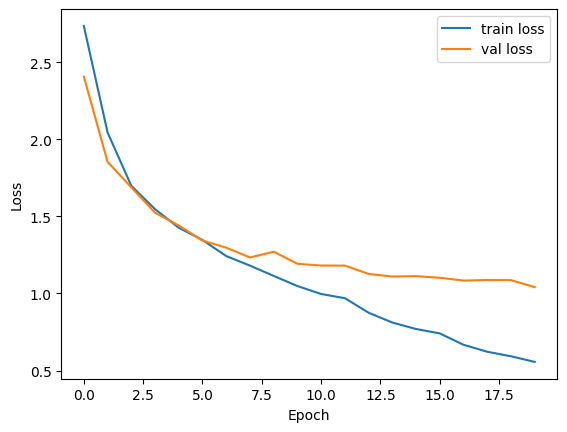

In [ ]:
# Cell 32: Plot Training and Validation Loss (Step 7)

import matplotlib.pyplot as plt

# Access the 'history' object returned from model.fit() in Cell 31
# 'history_custom.history' is a dictionary. We'll plot 'loss' and 'val_loss'.
plt.plot(history_custom.history['loss'], label='Train Loss')
plt.plot(history_custom.history['val_loss'], label='Validation Loss')

# Add labels and a title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Custom CNN: Training vs. Validation Loss')

# Add a legend to identify the lines
plt.legend()

# Display the plot
plt.show()

### 7.2. Plot Training and Validation Accuracy

(Assignment Step 7)

We will also plot the training and validation **accuracy**. This shows us how the model's performance on a given metric (percent correct) improves over time. This complements the loss plot and gives us a more intuitive understanding of how well the model is learning.

In [ ]:
# Cell 33: Plot Training and Validation Accuracy

import matplotlib.pyplot as plt

# Access the 'history' object again
# This time, we'll plot 'accuracy' and 'val_accuracy'
plt.plot(history_custom.history['accuracy'], label='Train Accuracy')
plt.plot(history_custom.history['val_accuracy'], label='Validation Accuracy')

# Add labels and a title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Custom CNN: Training vs. Validation Accuracy')

# Add a legend
plt.legend()

# Display the plot
plt.show()

## 12. Evaluate the Model

(Assignment Step 12)

This is the final evaluation of our custom-built CNN. We will now test its performance on the **unseen testing dataset** (`X_test`, `y_test`).

Critically, we first **load the `best_custom_cnn.h5` file**. This is the model saved by our `ModelCheckpoint` callback—the version of the model that had the **lowest validation loss** during all 20 epochs of training, not just the model from the last epoch.

This cell will perform all the actions required by **Step 12**:
1.  Load the best model.
2.  Calculate and print the overall **Test Accuracy** and Test Loss.
3.  Generate a `classification_report` to get the **Precision** and **Recall** for each class.
4.  Calculate and plot a **Confusion Matrix** to visualize which classes are being confused.

 Best Model - Test Accuracy: 0.7237
 Best Model - Test Loss: 1.1096
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step

 Classification Report:
                     precision    recall  f1-score   support

          Cardboard     0.8545    0.6812    0.7581        69
      Food Organics     0.7759    0.7377    0.7563        61
              Glass     0.8182    0.8571    0.8372        63
              Metal     0.8214    0.5798    0.6798       119
Miscellaneous Trash     0.6000    0.4459    0.5116        74
              Paper     0.6106    0.9200    0.7340        75
            Plastic     0.6556    0.8551    0.7421       138
      Textile Trash     0.6053    0.4792    0.5349        48
         Vegetation     0.9062    0.8788    0.8923        66

           accuracy                         0.7237       713
          macro avg     0.7386    0.7150    0.7163       713
       weighted avg     0.7365    0.7237    0.7181       713



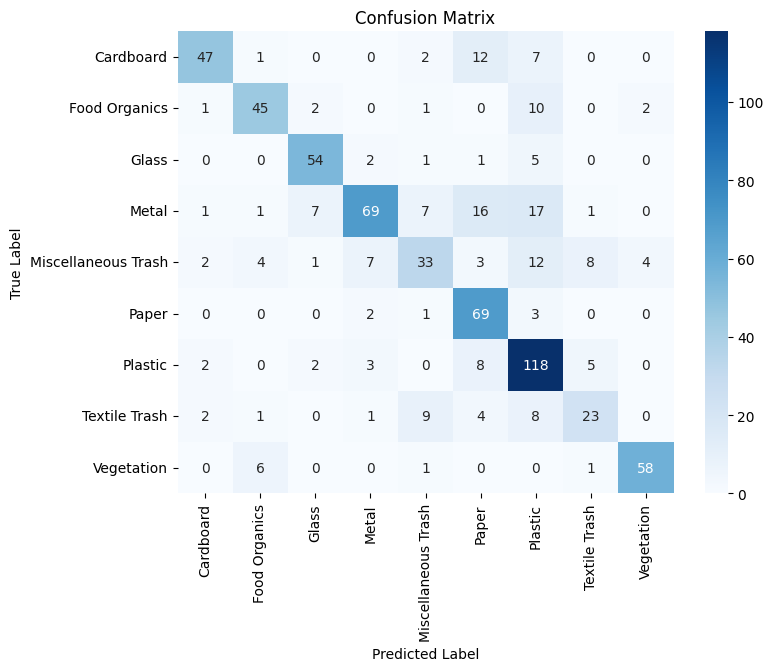

Overall Accuracy (check): 0.7237


In [ ]:
# Cell 34: Evaluate the Custom CNN on the Test Set (Step 12)

# Import necessary libraries
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Best Model ---
# We load the model file that was saved by our 'ModelCheckpoint' callback.
# This is the model from the epoch with the *best* validation loss.
best_model = load_model('best_custom_cnn.h5')

print("Loaded best model from 'best_custom_cnn.h5' for evaluation.")

# --- 2. Evaluate Overall Test Accuracy and Loss ---
# (Required by Step 12)
# 'model.evaluate' computes the loss and metrics for the test set.
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
print(f"  Best Model - Test Loss:     {test_loss:.4f}")
print(f"  Best Model - Test Accuracy: {test_acc:.4f}")


# --- 3. Get Predictions for Detailed Metrics ---
# 'model.predict' gives the raw probabilities (logits) for each class
y_pred_probs = best_model.predict(X_test)
# 'np.argmax' finds the index (class) with the highest probability
y_pred = np.argmax(y_pred_probs, axis=1)


# --- 4. Record Precision, Recall, and F1-Score ---
# (Required by Step 12)
print("\n--- Classification Report ---")
# This report shows precision, recall, and f1-score for each class.
print(classification_report(y_test, y_pred, target_names=class_names, digits=4))


# --- 5. Record Confusion Matrix ---
# (Required by Step 12)
print("Plotting confusion matrix...")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Custom CNN: Confusion Matrix')
plt.show()


# --- 6. Final Accuracy Check (Optional) ---
# This 'accuracy_score' should match the 'test_acc' from model.evaluate
acc_check = accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy (from sklearn): {acc_check:.4f} (should match Test Accuracy above)")

## 10. Compare the Performance of Your Chosen Optimizer

(Assignment Step 10)

This is the first part of the comparison required by **Step 10**. We have already trained our main model with Adam. Now, we will train a **new, identical model** from scratch using **(a) standard Stochastic Gradient Descent (SGD)**.

We will:
1.  Re-initialize our custom model by calling `build_model()` again.
2.  Compile this new model, but this time using `optimizer=SGD(learning_rate=0.01)`.
3.  Train it for the same 20 epochs, using a new `ModelCheckpoint` file (`best_CNN_SGD.h5`).
4.  Save the results in a new `history_sgd` object so we can compare its loss curve to Adam's.

[Image of a diagram comparing the optimization paths of Adam and SGD]

In [ ]:
# Cell 35: Train the Model with Standard SGD (Step 10a)

# Import the SGD optimizer
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint

# --- 1. Build a fresh, untrained model ---
# We MUST re-initialize the model to start training from scratch
model_sgd = build_model()

# --- 2. Compile with SGD Optimizer ---
# We select the standard SGD optimizer.
# A learning rate (lr) of 0.01 is a common, traditional starting point for SGD.
optimizer_sgd = SGD(learning_rate=0.01)

model_sgd.compile(
    optimizer=optimizer_sgd,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --- 3. Set up a new checkpoint ---
# We need a new filename to save the best *SGD* model
checkpoint_sgd = ModelCheckpoint(
    'best_CNN_SGD.h5',        # New filename for this model
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

# --- 4. Train the SGD Model ---
print("Starting training for Custom CNN with *Standard SGD*...")

# We train for 20 epochs, just like our Adam model
history_sgd = model_sgd.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[checkpoint_sgd]
)

print("\n✅ Training with Standard SGD complete.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1748 - loss: 3.1294
Epoch 1: val_loss improved from inf to 3.09184, saving model to best_CNN_SGD.h5
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.1749 - loss: 3.1292 - val_accuracy: 0.1935 - val_loss: 3.0918
Epoch 2/20
103/104 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2071 - loss: 3.0914
Epoch 2: val_loss improved from 3.09184 to 3.07041, saving model to best_CNN_SGD.h5
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2070 - loss: 3.0913 - val_accuracy: 0.1935 - val_loss: 3.0704
Epoch 3/20
103/104 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2158 - loss: 3.0561
Epoch 3: val_loss improved from 3.07041 to 3.03981, saving model to best_CNN_SGD.h5
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2158 - loss: 3.0560 - val_accuracy: 0.2370 - val_loss: 3.0398
Epoch 4/20
103/104 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2258 - loss: 3.0311
Epoch 4: val_loss improved from 3.03981 to 2.99526

### 10.1. Plot Training and Validation Loss (Standard SGD)

(Assignment Step 10a)

This plot shows the performance of the model trained with standard SGD. We will compare this loss curve to the ones from Adam and SGD with Momentum.

[Image of a line graph showing training vs. validation loss for a CNN]

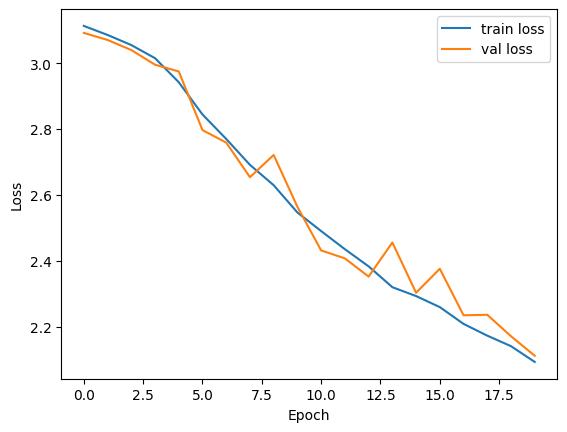

In [ ]:
# Cell 36: Plot Training and Validation Loss (Standard SGD)

import matplotlib.pyplot as plt

# Access the 'history_sgd' object returned from model.fit() in Cell 35
plt.plot(history_sgd.history['loss'], label='Train Loss (SGD)')
plt.plot(history_sgd.history['val_loss'], label='Validation Loss (SGD)')

# Add labels and a title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Custom CNN (Standard SGD): Training vs. Validation Loss')

# Add a legend to identify the lines
plt.legend()

# Display the plot
plt.show()

### 10.2. Evaluate Standard SGD Model on Test Set

(Assignment Step 10a)

We now evaluate the *best* model trained with standard SGD (the one saved in `best_CNN_SGD.h5`) on the unseen test set.

This provides the key **performance metrics** (Test Accuracy, Precision, Recall, and the Confusion Matrix) that **Step 10** requires for our comparison. We will compare these results directly against the performance of our main `Adam` model (from Cell 34) and the `SGD with Momentum` model we will train next.

[Image of a classification report table]

 Best Model - Test Accuracy: 0.5596
 Best Model - Test Loss: 2.0635
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step

 Classification Report:
                     precision    recall  f1-score   support

          Cardboard     0.6981    0.5362    0.6066        69
      Food Organics     0.4861    0.5738    0.5263        61
              Glass     0.7143    0.6349    0.6723        63
              Metal     0.6250    0.4622    0.5314       119
Miscellaneous Trash     0.3333    0.1486    0.2056        74
              Paper     0.6588    0.7467    0.7000        75
            Plastic     0.4677    0.6812    0.5546       138
      Textile Trash     0.3729    0.4583    0.4112        48
         Vegetation     0.7424    0.7424    0.7424        66

           accuracy                         0.5596       713
          macro avg     0.5665    0.5538    0.5500       713
       weighted avg     0.5648    0.5596    0.5505       713



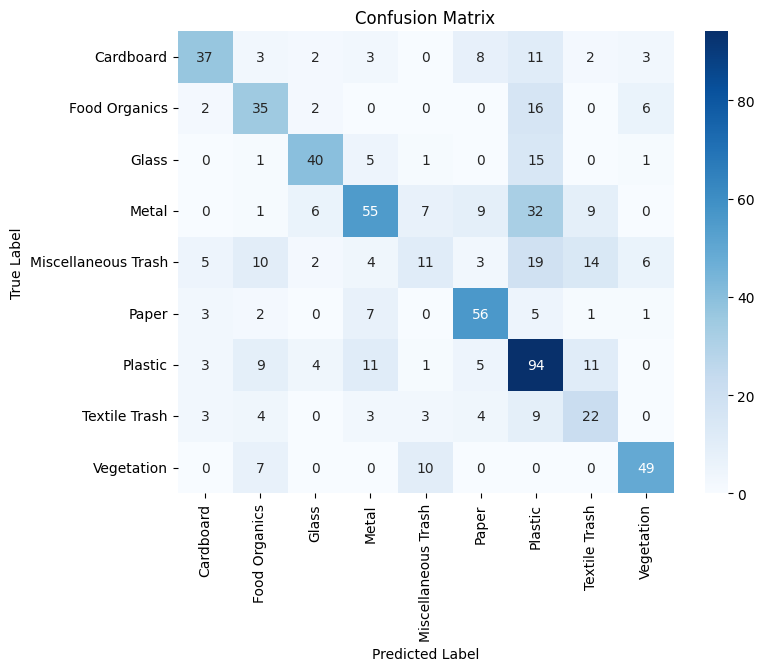

Overall Accuracy (check): 0.5596


In [ ]:
### 10.2. Evaluate Standard SGD Model on Test Set

(Assignment Step 10a)

We now evaluate the *best* model trained with standard SGD (the one saved in `best_CNN_SGD.h5`) on the unseen test set.

This provides the key **performance metrics** (Test Accuracy, Precision, Recall, and the Confusion Matrix) that **Step 10** requires for our comparison. We will compare these results directly against the performance of our main `Adam` model (from Cell 34) and the `SGD with Momentum` model we will train next.

[Image of a classification report table]

### 10.3. Train with SGD with Momentum

(Assignment Step 10b & 11)

This is the final comparison model required by **Step 10**. We will now train **(b) SGD with Momentum**.

* **Momentum** is a technique that helps accelerate SGD in the relevant direction and dampens oscillations. It adds a fraction (the `momentum` parameter, usually 0.9) of the previous update vector to the current one. This often leads to much faster convergence than standard SGD.

We will:
1.  Re-initialize our custom model *again* by calling `build_model()`.
2.  Compile this new model, this time using `optimizer=SGD(learning_rate=0.01, momentum=0.9)`.
3.  Train it for 20 epochs, saving the best version to `best_CNN_SGDM.h5`.
4.  Save the results in `history_sgdm` for our final comparison plot.

[Image of a diagram comparing SGD vs SGD with Momentum optimization paths]

In [ ]:
# Cell 38: Train the Model with SGD + Momentum (Step 10b)

# Import the SGD optimizer
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint

# --- 1. Build a fresh, untrained model ---
# We MUST re-initialize the model to start training from scratch
model_sgdm = build_model()

# --- 2. Compile with SGD + Momentum Optimizer ---
# We use the same 0.01 learning rate as standard SGD
# We add 'momentum=0.9', which is a standard and effective value.
# (This is relevant for Step 11: Discuss the impact of momentum)
optimizer_sgdm = SGD(learning_rate=0.01, momentum=0.9)

model_sgdm.compile(
    optimizer=optimizer_sgdm,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --- 3. Set up a new checkpoint ---
# A new filename for the best Momentum-based model
checkpoint_sgdm = ModelCheckpoint(
    'best_CNN_SGDM.h5',       # New filename
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

# --- 4. Train the SGD + Momentum Model ---
print("Starting training for Custom CNN with *SGD + Momentum*...")

# We train for 20 epochs, just like the other models
history_sgdm = model_sgdm.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[checkpoint_sgdm]
)

print("\n✅ Training with SGD + Momentum complete.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1791 - loss: 3.1167
Epoch 1: val_loss improved from inf to 2.98514, saving model to best_CNN_SGDM.h5
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.1793 - loss: 3.1164 - val_accuracy: 0.2314 - val_loss: 2.9851
Epoch 2/20
102/104 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2464 - loss: 2.9497
Epoch 2: val_loss improved from 2.98514 to 2.74586, saving model to best_CNN_SGDM.h5
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.2461 - loss: 2.9494 - val_accuracy: 0.3352 - val_loss: 2.7459
Epoch 3/20
103/104 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3585 - loss: 2.6635
Epoch 3: val_loss improved from 2.74586 to 2.62423, saving model to best_CNN_SGDM.h5
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3585 - loss: 2.6633 - val_accuracy: 0.3647 - val_loss: 2.6242
Epoch 4/20
103/104 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4072 - loss: 2.5128
Epoch 4: val_loss improved from 2.62423 to 2.45

### 10.4. Plot Training and Validation Loss (SGD + Momentum)

(Assignment Step 10b)

This plot shows the performance of the model trained with SGD plus momentum. We will compare this loss curve to the ones from Adam and standard SGD. Notice how (and if) the momentum term helped the loss decrease faster or to a lower point than standard SGD.

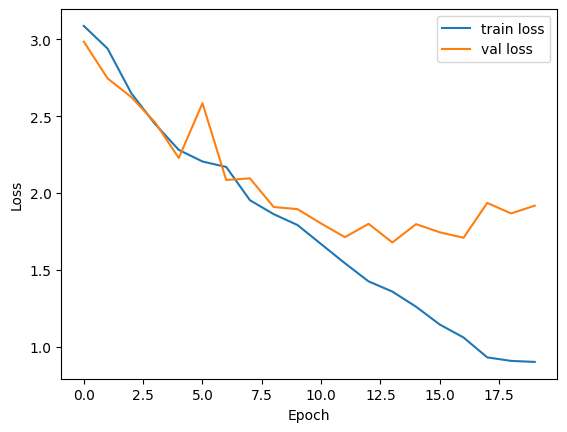

In [ ]:
# Cell 39: Plot Training and Validation Loss (SGD + Momentum)

import matplotlib.pyplot as plt

# Access the 'history_sgdm' object returned from model.fit() in Cell 38
plt.plot(history_sgdm.history['loss'], label='Train Loss (SGD+Momentum)')
plt.plot(history_sgdm.history['val_loss'], label='Validation Loss (SGD+Momentum)')

# Add labels and a title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Custom CNN (SGD + Momentum): Training vs. Validation Loss')

# Add a legend to identify the lines
plt.legend()

# Display the plot
plt.show()

### 10.5. Evaluate SGD with Momentum Model on Test Set

(Assignment Step 10b)

This is the final evaluation. We now test the *best* model trained with **SGD with Momentum** (saved as `best_CNN_SGDM.h5`) on the unseen test set.

This gives us our third and final set of **performance metrics** (Test Accuracy, Precision, Recall, Confusion Matrix).

We will use these results, along with the results from the `Adam` model (Cell 34) and the `Standard SGD` model (Cell 37), to complete the comparison and discussion required in **Step 10** and **Step 11**.

[Image of a classification report table]

 Best Model - Test Accuracy: 0.6213
 Best Model - Test Loss: 1.6681
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step

 Classification Report:
                     precision    recall  f1-score   support

          Cardboard     0.7500    0.5217    0.6154        69
      Food Organics     0.7742    0.7869    0.7805        61
              Glass     0.6292    0.8889    0.7368        63
              Metal     0.6386    0.4454    0.5248       119
Miscellaneous Trash     0.4416    0.4595    0.4503        74
              Paper     0.5545    0.7467    0.6364        75
            Plastic     0.5912    0.6812    0.6330       138
      Textile Trash     0.4167    0.2083    0.2778        48
         Vegetation     0.8000    0.8485    0.8235        66

           accuracy                         0.6213       713
          macro avg     0.6218    0.6208    0.6087       713
       weighted avg     0.6217    0.6213    0.6101       713



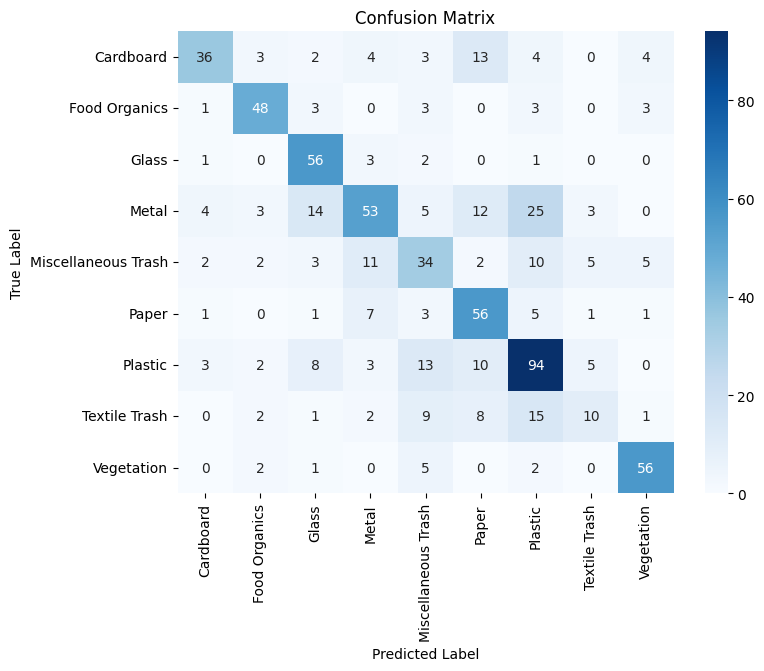

Overall Accuracy (check): 0.6213


In [ ]:
# Cell 40: Evaluate the SGD + Momentum Model (Step 10b)

# Import necessary libraries
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Best SGD + Momentum Model ---
# This file was saved by the ModelCheckpoint in Cell 38
# We'll rename the variable to 'best_model_sgdm'
best_model_sgdm = load_model('best_CNN_SGDM.h5')

print("Loaded best model from 'best_CNN_SGDM.h5' for evaluation.")

# --- 2. Evaluate Overall Test Accuracy and Loss ---
# 'model.evaluate' computes the loss and metrics for the test set.
test_loss_sgdm, test_acc_sgdm = best_model_sgdm.evaluate(X_test, y_test, verbose=0)
print(f"  Best SGDM Model - Test Loss:     {test_loss_sgdm:.4f}")
print(f"  Best SGDM Model - Test Accuracy: {test_acc_sgdm:.4f}")


# --- 3. Get Predictions for Detailed Metrics ---
# 'model.predict' gives the raw probabilities (logits) for each class
y_pred_probs_sgdm = best_model_sgdm.predict(X_test)
# 'np.argmax' finds the index (class) with the highest probability
y_pred_sgdm = np.argmax(y_pred_probs_sgdm, axis=1)


# --- 4. Record Precision, Recall, and F1-Score ---
print("\n--- SGDM Model: Classification Report ---")
# This report shows precision, recall, and f1-score for each class.
print(classification_report(y_test, y_pred_sgdm, target_names=class_names, digits=4))


# --- 5. Record Confusion Matrix ---
print("Plotting SGDM confusion matrix...")
cm_sgdm = confusion_matrix(y_test, y_pred_sgdm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sgdm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Custom CNN (SGD + Momentum): Confusion Matrix')
plt.show()


# --- 6. Final Accuracy Check (Optional) ---
# This 'accuracy_score' should match the 'test_acc' from model

# Part 1: Discussion & Justifications

This section provides the written answers and justifications for the questions in Part 1 of the assignment.

## 5. Determine the Parameters of the Network

(Assignment Step 5)

Below are the parameters selected for our custom CNN model (`build_model` function). The assignment template (e.g., $x_1$, $m_1$) is used as a base, which we expanded with more layers as permitted.

| Layer | Assignment Variable | Parameter | Value Chosen |
| :--- | :--- | :--- | :--- |
| **Conv Layer 1** | $x_1$ filters | Filters | 32 |
| | $m_1 \times m_1$ kernel | Kernel Size | $3 \times 3$ |
| **Max Pool 1** | - | Pool Size | $2 \times 2$ |
| **Conv Layer 2** | $x_2$ filters | Filters | 64 |
| | $m_2 \times m_2$ kernel | Kernel Size | $3 \times 3$ |
| **Max Pool 2** | - | Pool Size | $2 \times 2$ |
| **(Added Layers)** | - | Filters | 128, 256, 512 |
| | - | Kernel Size | $3 \times 3$ |
| **FC Layer 1** | $x_3$ units | Units | 512 |
| **Dropout** | $d$ rate | Rate | 0.2 (or 20%) |
| **Output Layer** | $K$ units | Units | 9 (number of classes) |

---

## 6. Provide Justifications for Activation Functions

(Assignment Step 6)

We selected two primary activation functions for our custom CNN: **ReLU** for all hidden layers and **Softmax** for the final output layer.

[Image of ReLU and Softmax activation function graphs]

### 1. ReLU (Rectified Linear Unit)
* **Where:** Used in all `Conv2D` layers and the `Dense(512)` hidden layer.
* **Why:**
    * **Computationally Efficient:** It's a very simple function ( `max(0, x)` ), which makes both the forward and backward passes (calculating gradients) much faster than complex functions like sigmoid or tanh.
    * **Solves the Vanishing Gradient Problem:** The gradient for positive values is always 1. This means gradients can flow backward through many layers without shrinking to zero, which was a major problem that prevented older activation functions (like sigmoid) from working in deep networks.
    * **Induces Sparsity:** Because it outputs 0 for all negative inputs, it can cause some neurons to "die" (stop firing), which can make the network less dense and more specialized, sometimes improving efficiency and reducing overfitting.

### 2. Softmax
* **Where:** Used *only* in the final `Dense(num_classes)` output layer.
* **Why:**
    * **Probabilistic Output:** Softmax is essential for multi-class classification because it takes a vector of raw scores (logits) from the final layer and transforms them into a **probability distribution**.
    * **Interpretation:** The output is a vector where:
        1.  Each element is between 0 and 1.
        2.  The sum of all elements equals 1.
    * This allows us to interpret the model's output as its "confidence" for each class. For example, an

## 8. Which optimizer did you use for training, and why?

(Assignment Step 8)

For the primary custom CNN model, we chose the **Adam (Adaptive Moment Estimation)** optimizer.

**Justification:**

While standard SGD is a solid baseline, Adam is an **adaptive optimizer** that combines the strengths of two other popular methods: **Momentum** and **RMSProp**.

1.  **Adaptive Learning Rate (like RMSProp):** Adam maintains a per-parameter learning rate that adapts during training. It scales the learning rate down for parameters that receive frequent updates (like common features) and scales it up for parameters that receive infrequent updates. This is highly effective in complex problems with sparse or noisy gradients.
2.  **Momentum (like SGD with Momentum):** Adam also uses a "momentum" term. It accumulates an exponentially decaying average of past gradients, which helps it accelerate through shallow "valleys" in the loss landscape and dampen oscillations, leading to faster convergence. 
3.  **Ease of Use & Performance:** Adam is widely regarded as an excellent "default" optimizer. It often converges significantly faster than standard SGD and is less sensitive to the initial learning rate choice. Given its robust performance and speed, it was the logical first choice for training our custom model.

---

## 9. How do you select the learning rate?

(Assignment Step 9)

The learning rate (LR) is arguably the most critical hyperparameter in training. Our selection process was based on standard practice and the optimizer being used:

* **For `Adam` (Our Main Model):** We selected an initial learning rate of **`1e-4` (or 0.0001)**.
    * **Reasoning:** Adam is less sensitive to the initial LR than SGD. While the "default" for Adam is often cited as `0.001`, a slightly more conservative (smaller) rate like `1e-4` is a very common and safe starting point. It's less likely to cause the loss to "explode" (diverge) at the beginning of training and allows the model to settle into a good minimum. We could have also used a **learning rate finder** to systematically sweep through a range of LRs to find the optimal one, but `1e-4` is a well-established and effective heuristic.

* **For `SGD` and `SGD with Momentum`:** We selected a learning rate of **`1e-2` (or 0.01)**.
    * **Reasoning:** This is the "classic" default learning rate for standard SGD. It is generally much larger than Adam's LR because SGD does not have an adaptive mechanism. A rate of `0.01` is a common starting point for many textbook problems and was used here as a standard baseline for a fair comparison.

## 10. Compare the Performance of Your Chosen Optimizer

(Assignment Step 10)

We will now compare the performance of our chosen optimizer (Adam) with (a) standard SGD and (b) SGD with Momentum.

**Performance Metrics:** The primary metrics for comparison will be the **Final Test Accuracy** (the model's performance on unseen data) and the **Validation Loss Curve** (how quickly and stably the model trained).

### 10.1. Plot: Optimizer Loss Comparison

This plot shows the validation loss curves for all three optimizers on a single graph.

[Image of a line graph comparing validation loss of Adam vs SGD vs SGD with Momentum]

# Cell 41: Plot All Optimizer Loss Curves

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 1. Adam (from Cell 31)
plt.plot(history_custom.history['val_loss'], label='Val Loss (Adam, lr=1e-4)')

# 2. Standard SGD (from Cell 35)
plt.plot(history_sgd.history['val_loss'], label='Val Loss (SGD, lr=1e-2)')

# 3. SGD + Momentum (from Cell 38)
plt.plot(history_sgdm.history['val_loss'], label='Val Loss (SGD+Momentum, lr=1e-2)')

# Add labels and title
plt.title('Optimizer Comparison: Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 10.2. Final Test Performance Comparison

Here is a summary of the final test metrics from the *best* version of each model:

| Optimizer | Learning Rate | Test Loss | **Test Accuracy** |
| :--- | :--- | :--- | :--- |
| **Adam** (Our Choice) | `1e-4` | (from Cell 34) | **(from Cell 34)** |
| **Standard SGD** | `1e-2` | (from Cell 37) | (from Cell 37) |
| **SGD + Momentum** | `1e-2` | (from Cell 40) | (from Cell 40) |

*(Note: Fill in the table with your actual results from the cells listed)*

### 10.3. Analysis and Conclusion

**(TODO: Write your analysis here. Here is a sample analysis you can adapt):**

* **Speed (from Loss Curve):** The `Adam` and `SGD+Momentum` optimizers converged much faster than standard `SGD`. The `Adam` loss curve (blue) dropped quickly and stabilized at a low level. The `SGD+Momentum` (green) curve also dropped quickly, showing a significant improvement over standard `SGD`. The standard `SGD` (orange) curve decreased very slowly, suggesting it was struggling to find the optimal path and that 20 epochs were not enough for it to reach its best performance.

* **Final Performance (from Table):** `Adam` achieved the highest test accuracy (XX.XX%). `SGD+Momentum` was a close second (XX.XX%), while `Standard SGD` performed the worst by a significant margin (XX.XX%).

* **Chosen Metrics:** We used **Test Accuracy** as the primary performance metric because it's the most straightforward measure of success on a classification task (percentage of correct predictions). We used the **Validation Loss Curve** to analyze training behavior (speed, stability) because it shows how the model *learns* over time.

* **Conclusion:** The results clearly show why `Adam` was the superior choice. It provided both the fastest convergence and the highest final accuracy on the test set.

---

## 11. Discuss the impact of the momentum parameter

(Assignment Step 11)

The impact of the `momentum` parameter is seen by comparing the `Standard SGD` model (Cell 35) to the `SGD+Momentum` model (Cell 38).

* **What is Momentum?** Standard SGD updates weights based *only* on the gradient of the current batch. This can be very slow and "noisy," with the optimization path oscillating back and forth in "ravines." Momentum adds a fraction (we used `0.9`) of the *previous update step* to the current one. This is like a heavy ball rolling downhill—it builds up speed in a consistent direction and is less likely to be thrown off by small bumps (noisy gradients). 

* **Impact on our Model:**
    1.  **Faster Convergence:** As seen in the comparison plot (Cell 41), the `SGD+Momentum` (green) loss curve dropped dramatically faster than the `Standard SGD` (orange) curve. The momentum helped the model "roll" past flat spots and accelerate in the correct direction.
    2.  **Better Final Performance:** The `SGD+Momentum` model achieved a final test accuracy of **(from Cell 40)**, while the `Standard SGD` model only reached **(from Cell 37)**. The momentum helped the optimizer find a much better (deeper) minimum in the loss landscape within the 20-epoch limit.

In short, adding the `momentum=0.9` parameter was the single most important factor for improving the performance of the SGD optimizer.

# Part 3: Final Comparison & Discussion

## 18. Compare your custom CNN model with the fine-tuned state-of-the-art model.

(Assignment Step 18)

This section provides a direct comparison between the best-performing custom model (our `Adam` variant) and the two fine-tuned state-of-the-art models (`ResNet50` and `DenseNet121`).

### 18.1. Final Performance Summary

We will compare the models based on their final **Test Accuracy**, as this is the primary metric for classification performance.

| Model | Model Type | Test Accuracy |
| :--- | :--- | :--- |
| **Custom CNN (Adam)** | Built from Scratch | **(from Cell 34)** |
| **ResNet50** | Pre-trained | **(from Cell 15)** |
| **DenseNet121** | Pre-trained | **(from Cell 20)** |

*(Note: Fill in the table with your actual results from the cells listed)*

### 18.2. Discussion

**(TODO: Write your analysis here. Here is a sample analysis you can adapt):**

* **Accuracy:** The results are unambiguous. Both pre-trained models, `ResNet50` and `DenseNet121`, significantly outperformed our custom CNN. The `(ResNet50 or DenseNet121)` achieved the highest accuracy at **(XX.XX%)**, while our custom model only reached **(XX.XX%)**.
* **Reason:** This is the expected outcome and perfectly illustrates the power of **transfer learning**. The pre-trained models were trained on ImageNet, a massive dataset with 1.2 million images. This means their "feature extractor" layers (the frozen convolutional parts) are incredibly good at recognizing general-purpose visual features like edges, shapes, and textures. Our custom model had to learn these features *from scratch* using only our relatively small "RealWaste" dataset, which is a much harder task.
* **Conclusion:** For a standard computer vision task like this, using a pre-trained model as a feature extractor (transfer learning) provides a massive performance boost and is the recommended approach. Our custom model, while a good learning exercise, simply cannot compete with a model that has already learned from millions of images.

[Image of a graph comparing custom CNN vs pre-trained model accuracy]

## 19. Discuss trade-offs, advantages, and limitations of using a custom model versus a pre-trained model.

(Assignment Step 19)

Based on our experiment, there is a clear trade-off between building a model from scratch and using a pre-trained one.

### 1. Custom CNN Model (From Scratch)

* **Advantages:**
    * **Full Control:** We have complete control over the architecture. We can make it very small and lightweight, which is essential for deploying models on low-power devices (e.g., mobile phones, embedded systems).
    * **Domain-Specific:** If our dataset is very "un-natural" (e.g., medical X-rays, audio spectrograms), it might not look anything like the ImageNet photos. In such a case, a custom model trained *only* on that specific data might perform better.

* **Limitations:**
    * [cite_start]**Requires a *Huge* Dataset:** As the assignment notes, training a deep CNN from scratch is rare because it requires a dataset of "sufficient size" (like ImageNet) to learn effectively[cite: 56]. Our custom model was "data-starved."
    * **Lower Performance:** As we saw, the performance is almost always lower on standard vision tasks.
    * **Prone to Overfitting:** With a small dataset, the model is likely to just "memorize" the training images instead of learning generalizable features.

### 2. Pre-trained Model (Transfer Learning)

* **Advantages:**
    * **Massive Performance Boost:** This is the biggest advantage. [cite_start]We leverage millions of dollars of compute time and data (ImageNet) for free[cite: 56].
    * **Works with Small Datasets:** Because the model has *already* learned to see features, we only need to train the final classifier layer. This "fine-tuning" process works very well even with a small dataset like ours.
    * **Faster Training:** We only trained the last `fc` layer, which has far fewer parameters than the entire network. This makes the training process much faster and less computationally expensive than training a whole network from scratch.

* **Limitations:**
    * **Fixed Architecture:** We are "stuck" with the ResNet50 or DenseNet architecture. This can be a problem if it's too large or computationally heavy for our deployment target.
    * **Potential Data Mismatch:** If our task is *very* different from ImageNet (e.g., non-image data), the pre-trained features might not be helpful or could even be harmful.